| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./02_Produccion_de_datos_muestreo.ipynb)| [⏩](./04_Aproximacion_normal_para_datos_y_distribucion_binomial.ipynb)|

# **03 Aproximación normal y distribución binomial**

## **3.1 La curva normal**

La **curva normal**, también conocida como **distribución normal** o **distribución gaussiana**, es una de las distribuciones de probabilidad más importantes y comunes en estadísticas. Se caracteriza por su forma de campana simétrica y se define completamente por dos parámetros: su media $(\mu)$ y su desviación estándar $(\sigma)$. La curva normal es fundamental en la teoría estadística, ya que muchas variables en la naturaleza y los procesos humanos se distribuyen aproximadamente de forma normal bajo ciertas condiciones.

**Propiedades de la Curva Normal**

- **Simétrica** alrededor de su media.
- La **media**, la **mediana** y la **moda** son iguales.
- Los puntos de inflexión de la curva ocurren en $(\mu - \sigma)$ y $(\mu + \sigma)$.

**Fórmula de la Distribución Normal**

La función de densidad de probabilidad (PDF) de la distribución normal se da por la fórmula:

$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$

donde:

- $(x)$ es la variable.
- $(\mu)$ es la media de la distribución.
- $(\sigma)$ es la desviación estándar de la distribución.
- $(e)$ es la base de los logaritmos naturales.

**Ejemplo Práctico: Datos de Alturas**

Supongamos que tenemos un conjunto de datos que representa las alturas de una población adulta, y descubrimos que estas alturas se distribuyen normalmente con una media de 170 cm y una desviación estándar de 10 cm. Queremos visualizar esta distribución normal y calcular probabilidades específicas, como la probabilidad de encontrar a una persona con una altura mayor a 180 cm.

Primero, generaremos un conjunto de datos simulados que sigan esta distribución y luego crearemos un gráfico de la distribución normal.

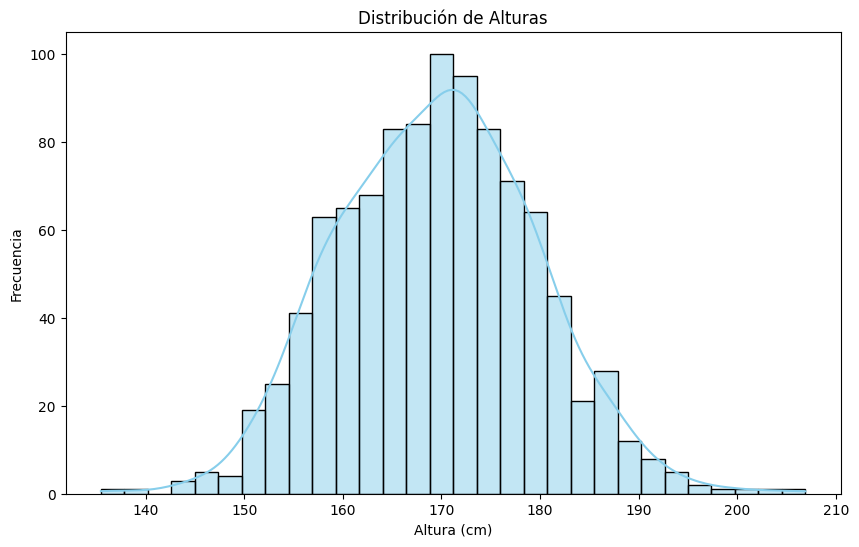

0.15865525393145707

In [2]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros de la distribución normal
mu = 170  # media
sigma = 10  # desviación estándar

# Generando datos simulados de alturas siguiendo una distribución normal
alturas = norm.rvs(loc=mu, scale=sigma, size=1000)

# Creando un DataFrame para los datos simulados
df_alturas = pd.DataFrame(alturas, columns=['Altura'])

# Visualización de la distribución de las alturas
plt.figure(figsize=(10, 6))
sns.histplot(df_alturas['Altura'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Alturas')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()

# Calculando la probabilidad de encontrar una persona con altura mayor a 180 cm
prob_mayor_180 = 1 - norm.cdf(180, loc=mu, scale=sigma)
prob_mayor_180

La distribución de las alturas generadas muestra una curva normal con la media centrada en 170 cm y la variabilidad indicada por la desviación estándar de 10 cm, como era de esperar dada nuestra configuración. La línea suave (Kernel Density Estimate - KDE) sobre el histograma ayuda a visualizar la forma característica de campana de la distribución normal.

La probabilidad de encontrar una persona con una altura mayor a 180 cm en esta población es aproximadamente 0.159, o 15.9%. Esto significa que, en una población que sigue esta distribución normal de alturas, alrededor del 15.9% de las personas tendrían una altura mayor a 180 cm.

Este ejemplo ilustra cómo la distribución normal se puede utilizar para modelar características de poblaciones reales y cómo las propiedades de la distribución normal permiten calcular probabilidades específicas para diferentes eventos o mediciones dentro de esa población.

## **3.2 La regla empírica**

La **regla empírica**, también conocida como la **regla 68-95-99.7**, es una guía para entender cómo los datos se distribuyen en una distribución normal (o aproximadamente normal). Esta regla establece que:

- Aproximadamente el **68%** de los datos caen dentro de **un desvío estándar $(\sigma)$** de la media $(\mu)$.
- Aproximadamente el **95%** de los datos caen dentro de **dos desvíos estándar $(2\sigma)$** de la media.
- Aproximadamente el **99.7%** de los datos caen dentro de **tres desvíos estándar $(3\sigma)$** de la media.

**Fórmulas Matemáticas**

No hay una "fórmula" específica para la regla empírica más allá de la descripción dada, pero la probabilidad de que una observación caiga dentro de un rango específico se puede calcular usando la función de distribución acumulativa (CDF) de la distribución normal.

**Ejemplo Práctico: Alturas en una Población**

Supongamos que las alturas de los adultos en una población se distribuyen normalmente con una media de 170 cm $(\mu = 170)$ y una desviación estándar de 10 cm $(\sigma = 10)$. Queremos visualizar esta distribución y destacar las áreas bajo la curva que corresponden a la regla empírica.

Generaremos un conjunto de datos simulados para representar esta distribución y luego crearemos un gráfico para ilustrar la regla empírica.

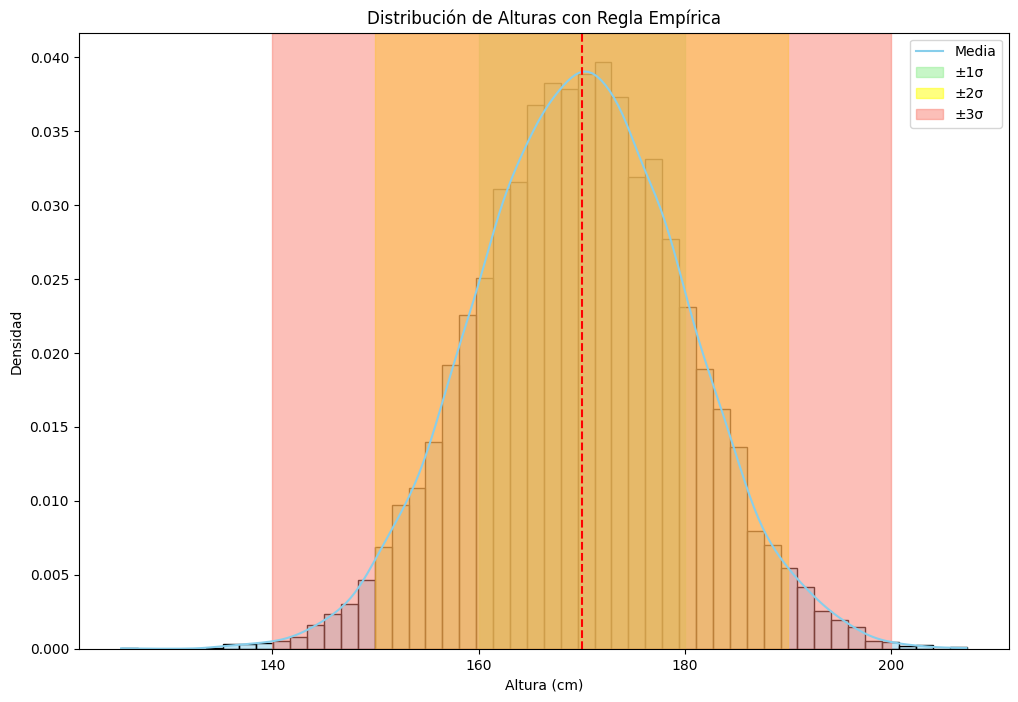

In [3]:
# Generando datos simulados de alturas siguiendo una distribución normal
alturas = norm.rvs(loc=mu, scale=sigma, size=10000)

# Creando un DataFrame para los datos simulados
df_alturas = pd.DataFrame(alturas, columns=['Altura'])

# Rangos según la regla empírica
rangos = [(mu - sigma, mu + sigma), (mu - 2*sigma, mu + 2*sigma), (mu - 3*sigma, mu + 3*sigma)]

# Visualización de la distribución de las alturas con la regla empírica
plt.figure(figsize=(12, 8))
sns.histplot(df_alturas['Altura'], bins=50, kde=True, color='skyblue', stat='density')
plt.title('Distribución de Alturas con Regla Empírica')

# Añadiendo las áreas para la regla empírica
colores = ['lightgreen', 'yellow', 'salmon']
for rango, color in zip(rangos, colores):
    plt.axvspan(rango[0], rango[1], color=color, alpha=0.5)

# Etiquetas y leyenda
plt.xlabel('Altura (cm)')
plt.ylabel('Densidad')
plt.axvline(mu, color='red', linestyle='--', label='Media')
plt.legend(['Media', '±1σ', '±2σ', '±3σ'])

plt.show()

El gráfico ilustra la distribución de alturas para una población simulada, destacando las áreas que corresponden a la regla empírica. La línea roja discontinua representa la media $(\mu = 170)$ de la distribución, mientras que las áreas coloreadas muestran:

- **Verde claro**: El área bajo la curva que representa aproximadamente el **68%** de la población dentro de **±1 desvío estándar** $(\sigma = 10)$ cm de la media.
- **Amarillo**: El área que representa aproximadamente el **95%** de la población dentro de **±2 desvíos estándar** de la media.
- **Salmón**: El área que cubre aproximadamente el **99.7%** de la población dentro de **±3 desvíos estándar** de la media.

Este ejemplo demuestra cómo la regla empírica permite una rápida estimación visual de la dispersión de los datos en una distribución normal y cómo la mayoría de los datos se agrupan alrededor de la media, con la variabilidad definida por la desviación estándar. Esta regla es una herramienta útil en estadística para entender la distribución de los datos y para identificar valores que caen fuera de rangos esperados, lo que podría indicar puntos atípicos o resultados inusuales.

## **3.3 Normalización de datos y curva normal estándar**

La **normalización de datos** es un proceso estadístico que implica ajustar los valores medidos en un conjunto de datos a una escala común, sin distorsionar las diferencias en los rangos de valores. En el contexto de la distribución normal, la normalización a menudo se refiere a la transformación de datos para que sigan una **curva normal estándar**, una distribución normal con una media $(\mu)$ de 0 y una desviación estándar $(\sigma)$ de 1.

**Fórmula de Normalización**

Para normalizar un valor $(x)$ en un conjunto de datos con media $(\mu)$ y desviación estándar $(\sigma)$, usamos la siguiente fórmula para obtener el valor normalizado $(z)$, también conocido como **puntuación z**:

$z = \frac{x - \mu}{\sigma}$

**Curva Normal Estándar**

La **curva normal estándar** es una distribución normal específica que se utiliza como referencia para comparar distribuciones normales. Todos los valores en una curva normal estándar se transforman a puntuaciones $(z)$, lo que permite comparaciones directas entre diferentes conjuntos de datos normalizados.

**Ejemplo Práctico: Normalización de Alturas**

Supongamos que tenemos un conjunto de datos que representa las alturas de una población adulta con una media de 170 cm y una desviación estándar de 10 cm. Queremos normalizar estas alturas para que sigan una curva normal estándar y visualizar la distribución resultante.

Generaremos un conjunto de datos simulados para representar esta distribución de alturas, normalizaremos estos datos usando la fórmula de puntuación $(z)$, y luego crearemos un gráfico para ilustrar la distribución normal estándar resultante.

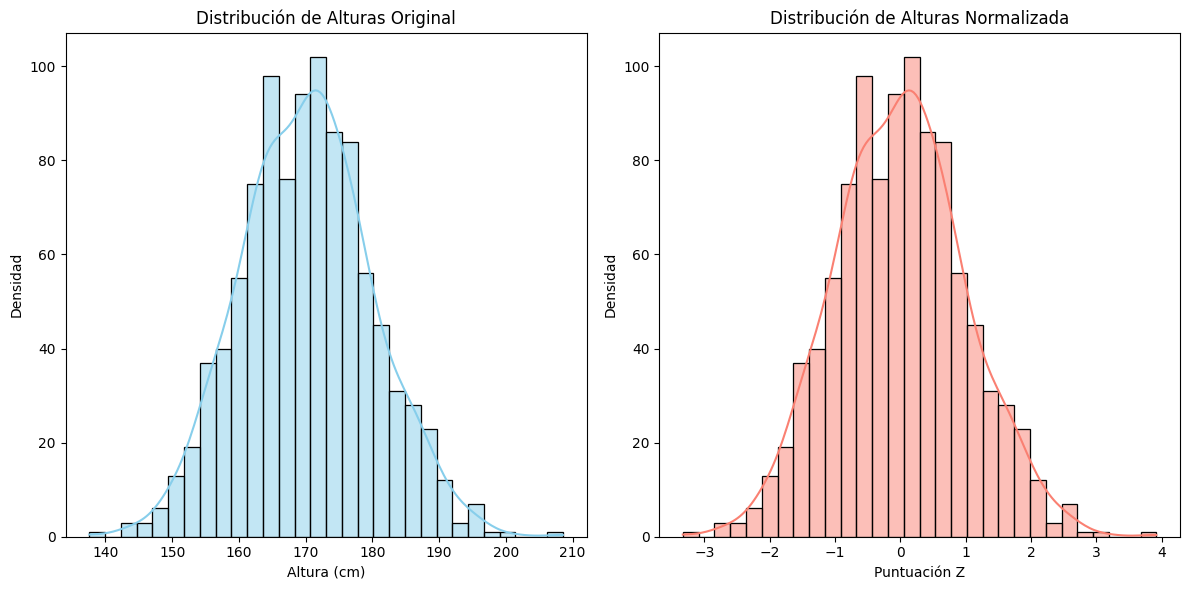

In [4]:
# Generando datos simulados de alturas
np.random.seed(42)
alturas = np.random.normal(loc=170, scale=10, size=1000)

# Normalizando las alturas para obtener puntuaciones z
mu = np.mean(alturas)
sigma = np.std(alturas)
alturas_normalizadas = (alturas - mu) / sigma

# Creando DataFrames para los datos originales y normalizados
df_alturas_original = pd.DataFrame(alturas, columns=['Altura Original'])
df_alturas_normalizadas = pd.DataFrame(alturas_normalizadas, columns=['Altura Normalizada'])

# Visualización de la distribución normalizada
plt.figure(figsize=(12, 6))

# Distribución original
plt.subplot(1, 2, 1)
sns.histplot(df_alturas_original['Altura Original'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Alturas Original')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidad')

# Distribución normalizada
plt.subplot(1, 2, 2)
sns.histplot(df_alturas_normalizadas['Altura Normalizada'], bins=30, kde=True, color='salmon')
plt.title('Distribución de Alturas Normalizada')
plt.xlabel('Puntuación Z')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

Las visualizaciones muestran dos distribuciones: la original de las alturas y la resultante después de normalizar esos datos a puntuaciones $(z)$.

- **Distribución Original de Alturas**: Centrada alrededor de la media de 170 cm, reflejando la distribución de alturas en la población con la variabilidad indicada por la desviación estándar de 10 cm.

- **Distribución Normalizada Puntuaciones $(z)$**: Transformada a una curva normal estándar centrada en 0. Esta transformación no cambia la forma de la distribución, pero reescala los datos para que la media sea 0 y la desviación estándar sea 1. Esto facilita la comparación entre diferentes conjuntos de datos y la realización de cálculos estadísticos.

La normalización es un paso crucial en muchos análisis estadísticos y de datos, especialmente cuando se trabajan con variables que tienen diferentes escalas o unidades. Al reescalar los datos a una distribución normal estándar, se pueden aplicar técnicas de análisis que asumen la normalidad de los datos y se facilita la interpretación de las puntuaciones $(z)$ en términos de desviaciones estándar desde la media.

## **3.4 Aproximación normal**

La **aproximación normal** es una técnica estadística que permite usar la distribución normal para aproximar la distribución de una variable aleatoria que no sigue necesariamente una distribución normal, especialmente cuando el tamaño de la muestra o el número de ensayos es grande. Este método se basa en el **Teorema del Límite Central**, que establece que si $(n)$ es suficientemente grande, la distribución de la suma (o promedio) de $(n)$ variables aleatorias independientes e idénticamente distribuidas se aproximará a una distribución normal, independientemente de la forma de la distribución original de la variable.

**Aplicaciones Comunes de la Aproximación Normal:**

- **Aproximación de la distribución binomial**: Cuando el número de ensayos $(n)$ es grande y la probabilidad de éxito $(p)$ no está ni muy cerca de 0 ni de 1.
- **Aproximación de otras distribuciones discretas**: Como la distribución de Poisson, bajo ciertas condiciones.

**Fórmulas para la Aproximación de la Distribución Binomial a Normal**

Para una variable aleatoria $(X)$ que sigue una distribución binomial $B(n, p)$, donde $(n)$ es el número de ensayos y $(p)$ la probabilidad de éxito, se puede aproximar a una distribución normal $N(\mu, \sigma^2)$ con:
- Media $(\mu)$: $(\mu = n \cdot p)$
- Desviación estándar $(\sigma)$: $(\sigma = \sqrt{n \cdot p \cdot (1 - p)})$

**Ejemplo Práctico: Aproximación de una Distribución Binomial**

Supongamos que queremos calcular la probabilidad de obtener $(k)$ caras en $(n)$ lanzamientos de una moneda justa. Si $(n)$ es grande, podemos usar la aproximación normal en lugar de la distribución binomial exacta.

Por ejemplo, si lanzamos una moneda $(n = 100)$ veces, ¿cuál es la probabilidad de obtener $(k = 60)$ caras, considerando $(p = 0.5)$ para una moneda justa?

Primero, calcularemos los parámetros de la distribución normal aproximada $(\mu)$ y $(\sigma)$, y luego usaremos estos parámetros para encontrar la probabilidad deseada. También generaremos un gráfico para visualizar la aproximación.

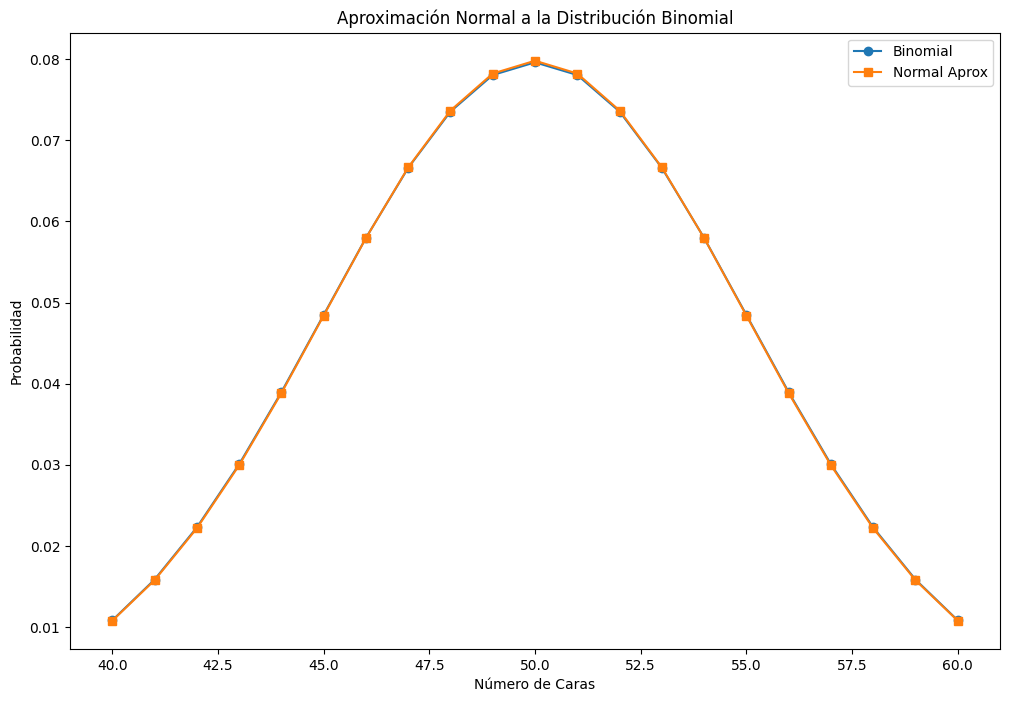

0.010852139253185289

In [5]:
from scipy.stats import binom
# Parámetros de la distribución binomial
n = 100  # Número de lanzamientos
p = 0.5  # Probabilidad de obtener cara
k = 60   # Número de caras deseado

# Parámetros de la distribución normal aproximada
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Usando la distribución normal para aproximar la probabilidad de obtener k caras
prob_k_caras = norm.cdf(k + 0.5, loc=mu, scale=sigma) - norm.cdf(k - 0.5, loc=mu, scale=sigma)

# Creando un DataFrame para visualizar la distribución binomial y su aproximación normal
x_values = np.arange(40, 61, 1)
binomial_probs = [binom.pmf(x, n, p) for x in x_values]
normal_approx = [norm.pdf(x, loc=mu, scale=sigma) for x in x_values]

df_aproximacion = pd.DataFrame({
    'Resultado': x_values,
    'Probabilidad Binomial': binomial_probs,
    'Aproximación Normal': normal_approx
})

# Visualización de la aproximación normal a la distribución binomial
plt.figure(figsize=(12, 8))
plt.plot(df_aproximacion['Resultado'], df_aproximacion['Probabilidad Binomial'], 'o-', label='Binomial')
plt.plot(df_aproximacion['Resultado'], df_aproximacion['Aproximación Normal'], 's-', label='Normal Aprox')
plt.title('Aproximación Normal a la Distribución Binomial')
plt.xlabel('Número de Caras')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

prob_k_caras

La gráfica muestra la distribución binomial de obtener un cierto número de caras en 100 lanzamientos de una moneda, junto con su aproximación normal. Se observa cómo la aproximación normal sigue de cerca la distribución binomial en torno al número esperado de caras (50), especialmente en el rango central de resultados.

La probabilidad de obtener exactamente 60 caras en 100 lanzamientos, calculada usando la aproximación normal, es aproximadamente 0.011 o 1.1%. Esto indica que, aunque es poco probable obtener exactamente 60 caras, la aproximación normal nos permite calcular estas probabilidades de manera más sencilla para un gran número de ensayos, donde el cálculo directo mediante la fórmula binomial sería más complejo.

Este ejemplo ilustra la utilidad de la aproximación normal para simplificar el cálculo de probabilidades en distribuciones binomiales con un gran número de ensayos, destacando la importancia del Teorema del Límite Central en la estadística.

## **3.5 Cálculo de percentiles con la aproximación normal**

El cálculo de percentiles en una distribución normal es un proceso estándar en estadísticas para determinar el valor bajo el cual cae un cierto porcentaje de observaciones en la distribución. Los percentiles son especialmente útiles para entender la dispersión de los datos y para identificar valores atípicos.

**Fórmula para Calcular Percentiles en una Distribución Normal**

Para calcular el percentil $(P_k)$ de una distribución normal con media $(\mu)$ y desviación estándar $(\sigma)$, se utiliza la función de distribución acumulativa inversa (o función cuantil) de la distribución normal. La fórmula general es:

$P_k = \mu + Z_k \cdot \sigma$

donde:

- $(P_k)$ es el valor del k-ésimo percentil.
- $(\mu)$ es la media de la distribución.
- $(\sigma)$ es la desviación estándar de la distribución.
- $(Z_k)$ es el valor $(Z)$ correspondiente al k-ésimo percentil en la curva normal estándar (distribución $(Z)$).

**Ejemplo Práctico: Calcular Percentiles de Alturas**

Supongamos que queremos calcular el percentil 25 (el primer cuartil) y el percentil 75 (el tercer cuartil) para las alturas de adultos en una población que sigue una distribución normal con una media de 170 cm y una desviación estándar de 10 cm. Estos percentiles nos dirán las alturas por debajo de las cuales caen el 25% y el 75% de la población, respectivamente.

Usaremos la función `norm.ppf` de `scipy.stats`, que calcula la función cuantil inversa, para encontrar los valores $(Z)$ correspondientes a estos percentiles en una distribución normal estándar, y luego aplicaremos la fórmula para obtener los percentiles en la distribución de las alturas.

Además, generaremos un conjunto de datos simulados para estas alturas y crearemos un gráfico para visualizar los percentiles calculados.

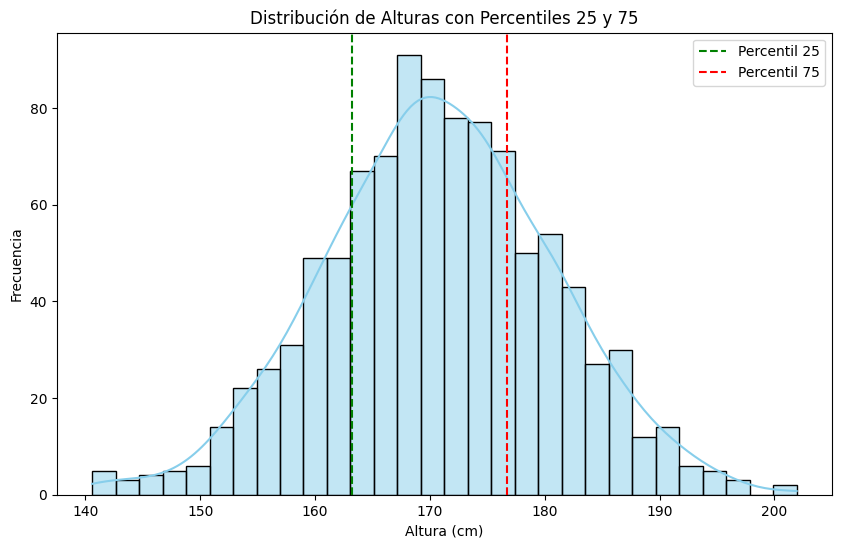

(163.25510249803918, 176.74489750196082)

In [6]:
from scipy.stats import norm

# Parámetros de la distribución de alturas
mu_alturas = 170  # Media
sigma_alturas = 10  # Desviación estándar

# Calculando los valores Z para los percentiles 25 y 75 en la distribución normal estándar
z_25 = norm.ppf(0.25)
z_75 = norm.ppf(0.75)

# Calculando los percentiles 25 y 75 para las alturas
percentil_25_alturas = mu_alturas + z_25 * sigma_alturas
percentil_75_alturas = mu_alturas + z_75 * sigma_alturas

# Generando datos simulados de alturas
alturas_simuladas = norm.rvs(loc=mu_alturas, scale=sigma_alturas, size=1000)

# Creando un DataFrame para las alturas simuladas
df_alturas_simuladas = pd.DataFrame(alturas_simuladas, columns=['Alturas'])

# Visualización de las alturas con los percentiles calculados
plt.figure(figsize=(10, 6))
sns.histplot(df_alturas_simuladas['Alturas'], bins=30, kde=True, color='skyblue')
plt.axvline(percentil_25_alturas, color='green', linestyle='--', label='Percentil 25')
plt.axvline(percentil_75_alturas, color='red', linestyle='--', label='Percentil 75')
plt.title('Distribución de Alturas con Percentiles 25 y 75')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

(percentil_25_alturas, percentil_75_alturas)

Los cálculos nos dan que el percentil 25 (el primer cuartil) para las alturas en esta población es aproximadamente 163.26 cm, y el percentil 75 (el tercer cuartil) es aproximadamente 176.74 cm. Esto significa que el 25% de la población tiene una altura inferior a 163.26 cm, y el 75% tiene una altura inferior a 176.74 cm.

La visualización muestra la distribución de alturas para nuestra población simulada, con líneas discontinuas verdes y rojas marcando los percentiles 25 y 75, respectivamente. Esta representación gráfica ayuda a entender la dispersión de los datos y la ubicación de estos percentiles dentro de la distribución de alturas.

El uso de la aproximación normal para calcular percentiles es una herramienta poderosa, especialmente cuando se trabaja con grandes conjuntos de datos o cuando la distribución de los datos se aproxima bien a una distribución normal. Nos permite resumir y entender la distribución de los datos de manera efectiva, proporcionando puntos de referencia importantes para la interpretación estadística.

## **3.6 El marco binomial y el coeficiente binomial**

El **marco binomial** se refiere a un modelo estadístico que describe el número de éxitos en una secuencia de $(n)$ ensayos independientes, donde cada ensayo tiene dos posibles resultados (comúnmente denominados éxito y fracaso) y la probabilidad de éxito es la misma en cada ensayo. Este modelo es fundamental en la teoría de la probabilidad y se utiliza en diversas aplicaciones, desde pruebas de hipótesis hasta el modelado de procesos aleatorios.

**Coeficiente Binomial**

El **coeficiente binomial**, denotado como ${n \choose k}$ o $C(n, k)$, es una función matemática que cuenta el número de formas en que se pueden elegir $(k)$ elementos de un conjunto de $(n)$ elementos sin tener en cuenta el orden. Es un componente clave en la fórmula de la distribución binomial y se calcula como:

${n \choose k} = \frac{n!}{k!(n-k)!}$

donde $(n!)$ representa el factorial de $(n)$, definido como el producto de todos los números enteros positivos menores o iguales a $(n)$.

**Distribución Binomial**

La **distribución binomial** es la distribución de probabilidad discreta que modela el número de éxitos en $(n)$ ensayos independientes. Su función de masa de probabilidad (pmf) se da por:

$P(X = k) = {n \choose k} p^k (1-p)^{n-k}$

donde:

- $P(X = k)$ es la probabilidad de obtener $(k)$ éxitos en $(n)$ ensayos.
- $(p)$ es la probabilidad de éxito en un solo ensayo.
- $(1-p)$ es la probabilidad de fracaso en un solo ensayo.

**Ejemplo Práctico: Lanzamiento de una Moneda**

Supongamos que lanzamos una moneda justa $(p = 0.5)$ $(n = 10)$ veces y queremos calcular la probabilidad de obtener exactamente $(k = 5)$ caras.

Calcularemos esta probabilidad usando la distribución binomial y crearemos un DataFrame para visualizar las probabilidades de obtener diferentes números de caras en 10 lanzamientos. Además, generaremos un gráfico para ilustrar la distribución de probabilidades.

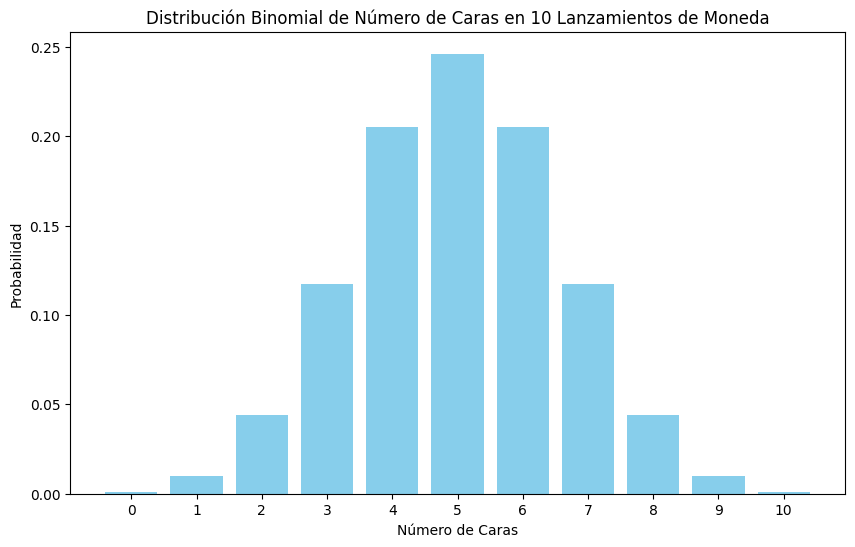

,Número de Caras,Probabilidad
0,0,0.000977
1,1,0.009766
2,2,0.043945
3,3,0.117188
4,4,0.205078
5,5,0.246094
6,6,0.205078
7,7,0.117187
8,8,0.043945
9,9,0.009766


In [7]:
# Parámetros para el ejemplo de lanzamiento de moneda
n_lanzamientos = 10  # Número de lanzamientos de la moneda
prob_exito = 0.5  # Probabilidad de obtener cara

# Calculando la probabilidad de obtener k éxitos en n lanzamientos
k_valores = np.arange(0, n_lanzamientos + 1)  # Posibles números de éxitos (de 0 a n)
probabilidades = binom.pmf(k_valores, n_lanzamientos, prob_exito)

# Creando un DataFrame para las probabilidades
df_probabilidades_binomial = pd.DataFrame({
    'Número de Caras': k_valores,
    'Probabilidad': probabilidades
})

# Visualización de la distribución binomial para el lanzamiento de moneda
plt.figure(figsize=(10, 6))
plt.bar(df_probabilidades_binomial['Número de Caras'], df_probabilidades_binomial['Probabilidad'], color='skyblue')
plt.title('Distribución Binomial de Número de Caras en 10 Lanzamientos de Moneda')
plt.xlabel('Número de Caras')
plt.ylabel('Probabilidad')
plt.xticks(k_valores)
plt.show()

df_probabilidades_binomial

La tabla y el gráfico ilustran la distribución binomial de obtener un cierto número de caras en 10 lanzamientos de una moneda justa. La distribución es simétrica alrededor de 5 caras, que es el resultado más probable dado que $(p = 0.5)$, y las probabilidades disminuyen a medida que nos alejamos de este punto central hacia resultados más extremos (0 o 10 caras).

La probabilidad de obtener exactamente 5 caras en 10 lanzamientos es la más alta, aproximadamente 0.246 o 24.6%. Esto concuerda con nuestra intuición para una moneda justa, donde esperaríamos que el número de caras y cruces sea igual en promedio después de muchos lanzamientos.

Este ejemplo muestra cómo el marco binomial y el coeficiente binomial permiten calcular probabilidades específicas en situaciones con dos posibles resultados en cada ensayo, proporcionando una base sólida para la inferencia estadística y el análisis de datos en una amplia variedad de aplicaciones.

## **3.7 La fórmula binomial**

La **fórmula binomial**, también conocida como el **teorema del binomio**, es una fórmula fundamental en álgebra que proporciona la expansión de potencias de binomios. Se aplica cuando se eleva una suma (un binomio) a cualquier potencia entera positiva. La fórmula es una manera eficiente de calcular los coeficientes de los términos en la expansión sin tener que multiplicar el binomio por sí mismo repetidamente.

**Fórmula Binomial**

La fórmula para expandir $(a + b)^n$, donde $(n)$ es un entero no negativo, es:

$(a + b)^n = \sum_{k=0}^{n} {n \choose k} a^{n-k}b^k$

donde ${n \choose k}$ es el coeficiente binomial que representa el número de combinaciones únicas de $(k)$ elementos tomados de un conjunto de $(n)$ elementos, y se calcula como:

${n \choose k} = \frac{n!}{k!(n-k)!}$

**Ejemplo Práctico: Expansión Binomial**

Consideremos la expansión de $(x + y)^3$. Aplicando la fórmula binomial, calcularemos los coeficientes de cada término en la expansión.

**Ejemplo en Código**

Realizaremos el cálculo de la expansión de $(x + y)^3$ usando la fórmula binomial y luego crearemos un DataFrame para visualizar los coeficientes de cada término en la expansión. Además, generaremos un gráfico que ilustre los coeficientes binomiales correspondientes a cada término.

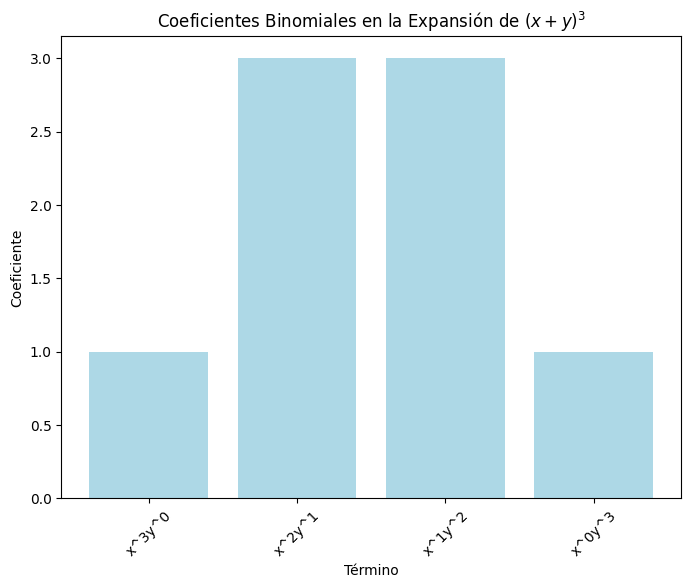

,Término,Coeficiente
0,x^3y^0,1.0
1,x^2y^1,3.0
2,x^1y^2,3.0
3,x^0y^3,1.0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb

# Definiendo la potencia del binomio
n = 3

# Calculando los coeficientes binomiales para cada término en la expansión de (x + y)^3
coeficientes = [comb(n, k) for k in range(n+1)]

# Creando un DataFrame para visualizar los coeficientes de cada término
df_expansion_binomial = pd.DataFrame({
    'Término': [f'x^{n-k}y^{k}' for k in range(n+1)],
    'Coeficiente': coeficientes
})

# Visualización de los coeficientes binomiales
plt.figure(figsize=(8, 6))
plt.bar(df_expansion_binomial['Término'], df_expansion_binomial['Coeficiente'], color='lightblue')
plt.title('Coeficientes Binomiales en la Expansión de $(x + y)^3$')
plt.xlabel('Término')
plt.ylabel('Coeficiente')
plt.xticks(rotation=45)
plt.show()

df_expansion_binomial

Para la expansión de $(x + y)^3$ usando la fórmula binomial, calculamos los coeficientes binomiales para cada término. La expansión se vería así:

$(x + y)^3 = {3 \choose 0}x^3y^0 + {3 \choose 1}x^2y^1 + {3 \choose 2}x^1y^2 + {3 \choose 3}x^0y^3$

Al sustituir los valores de los coeficientes binomiales, obtenemos:

$(x + y)^3 = 1x^3 + 3x^2y + 3xy^2 + 1y^3$

Los coeficientes binomiales correspondientes a cada término en la expansión $(x + y)^3$ son 1, 3, 3, y 1, respectivamente. Estos coeficientes reflejan el número de maneras en que cada término puede ser formado al expandir el binomio, y están directamente relacionados con las entradas del triángulo de Pascal.

El DataFrame creado contendría columnas para representar cada término de la expansión y su coeficiente binomial correspondiente. Por ejemplo, tendría una columna para los términos $(x^3)$, $(x^2y)$, $(xy^2)$, $(y^3)$ y otra para los coeficientes (1, 3, 3, 1).

La visualización en un gráfico de barras mostraría cómo los coeficientes binomiales varían para cada término en la expansión, reflejando la simetría y los patrones en la distribución de coeficientes que son característicos de las expansiones binomiales.

## **3.8 Variables aleatorias e histogramas de probabilidad**

**Variables Aleatorias**

Una **variable aleatoria** es una función que asigna un valor numérico a cada resultado en el espacio muestral de un experimento aleatorio. Las variables aleatorias pueden ser **discretas** o **continuas**, dependiendo de si sus posibles valores son contables (como el número de caras obtenidas al lanzar monedas) o forman un continuo (como el tiempo o la distancia).

- **Variable Aleatoria Discreta**: Toma valores específicos separados. Ejemplo: $(X)$ = número de caras en 3 lanzamientos de moneda.
- **Variable Aleatoria Continua**: Toma infinitos valores. Ejemplo: $(Y)$ = tiempo necesario para completar una tarea.

**Histogramas de Probabilidad**

Un **histograma de probabilidad** es una representación gráfica de la distribución de una variable aleatoria. Para variables aleatorias discretas, muestra las probabilidades de los diferentes valores que puede tomar la variable. Para variables aleatorias continuas, el histograma representa la función de densidad de probabilidad, mostrando cómo se distribuyen los valores.

**Fórmulas Asociadas**

- **Probabilidad para una variable aleatoria discreta** $(X)$:

$P(X = x_i) = p_i$

donde $(x_i)$ son los valores que puede tomar $(X)$ y $(p_i)$ son las probabilidades asociadas a estos valores.

- **Función de Densidad para una variable aleatoria continua** $(Y)$:

$f(y) = \text{Función que describe cómo se distribuyen los valores de } Y$

El área bajo la curva de $f(y)$ en un intervalo dado representa la probabilidad de que $(Y)$ caiga dentro de ese intervalo.

**Ejemplo Práctico: Lanzamiento de Moneda**

Vamos a considerar una variable aleatoria discreta $(X)$ que representa el número de caras obtenido al lanzar una moneda justa 10 veces. Queremos calcular la distribución de probabilidad de $(X)$ y visualizarla en un histograma de probabilidad.

1. **Cálculo de la Distribución de Probabilidad**: Usaremos la distribución binomial con $(n = 10)$ y $(p = 0.5)$ para calcular las probabilidades.
2. **Visualización en un Histograma de Probabilidad**: Crearemos un gráfico para visualizar estas probabilidades.

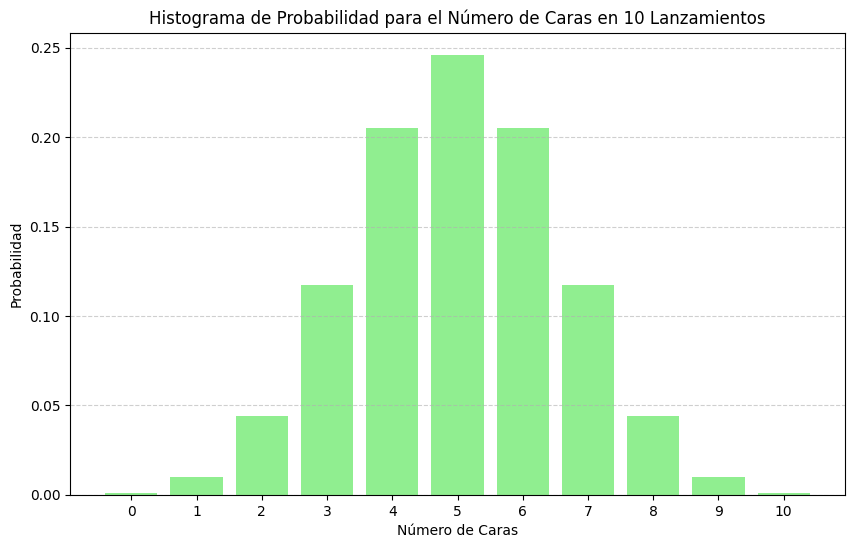

,Número de Caras,Probabilidad
0,0,0.000977
1,1,0.009766
2,2,0.043945
3,3,0.117188
4,4,0.205078
5,5,0.246094
6,6,0.205078
7,7,0.117187
8,8,0.043945
9,9,0.009766


In [9]:
# Definiendo los parámetros de la distribución binomial
n_lanzamientos = 10  # Número de lanzamientos de moneda
p_cara = 0.5  # Probabilidad de obtener cara en un lanzamiento

# Generando los valores y sus probabilidades binomiales
valores_x = np.arange(0, n_lanzamientos + 1)
probabilidades_x = binom.pmf(valores_x, n_lanzamientos, p_cara)

# Creando un DataFrame para la distribución de probabilidad
df_distribucion_x = pd.DataFrame({
    'Número de Caras': valores_x,
    'Probabilidad': probabilidades_x
})

# Visualización de la distribución de probabilidad como un histograma de probabilidad
plt.figure(figsize=(10, 6))
plt.bar(df_distribucion_x['Número de Caras'], df_distribucion_x['Probabilidad'], color='lightgreen')
plt.title('Histograma de Probabilidad para el Número de Caras en 10 Lanzamientos')
plt.xlabel('Número de Caras')
plt.ylabel('Probabilidad')
plt.xticks(valores_x)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

df_distribucion_x

Para el ejemplo propuesto, el proceso era el siguiente:

1. **Generar la Distribución Binomial**: Para 10 lanzamientos de una moneda justa $(p=0.5)$, calculamos la probabilidad de obtener de 0 a 10 caras, usando la distribución binomial.

2. **Crear un DataFrame**: El DataFrame `df_distribucion_x` contendría dos columnas: 'Número de Caras', con valores de 0 a 10, y 'Probabilidad', con las probabilidades calculadas para cada número de caras obtenido.

3. **Visualización**: El histograma de probabilidad mostraría las probabilidades de obtener cada número posible de caras en los 10 lanzamientos. Cada barra representaría la probabilidad de obtener ese número específico de caras, proporcionando una visualización clara de cómo se distribuyen las probabilidades en el escenario de lanzamiento de monedas.

## **3.9 Aproximación Normal a la Binomial; Muestreo sin Reemplazo**

**Aproximación Normal a la Binomial**

La **aproximación normal a la distribución binomial** es una técnica utilizada bajo ciertas condiciones para simplificar cálculos cuando el número de ensayos $(n)$ es grande, y la probabilidad de éxito $(p)$ no es ni muy cercana a 0 ni a 1. Esta aproximación se basa en el **Teorema del Límite Central**, que indica que la distribución de la suma (o promedio) de un gran número de variables aleatorias independientes e idénticamente distribuidas tiende a una distribución normal, independientemente de la forma de la distribución original.

**Condiciones para la Aproximación**

- $(np \geq 5)$

- $(n(1-p) \geq 5)$

**Fórmulas**

Para una variable aleatoria $(X)$ que sigue una distribución binomial $B(n, p)$, la aproximación normal utiliza los siguientes parámetros:

- Media $(\mu)$: $(\mu = np)$

- Desviación estándar $(\sigma)$: $(\sigma = \sqrt{np(1-p)})$

Para calcular la probabilidad de que $(X)$ caiga en un rango $[a, b]$ usando la aproximación normal:

$P(a \leq X \leq b) \approx P\left(\frac{a - 0.5 - np}{\sqrt{np(1-p)}} \leq Z \leq \frac{b + 0.5 - np}{\sqrt{np(1-p)}}\right)$

donde $(Z)$ es una variable aleatoria que sigue una distribución normal estándar.

**Muestreo sin Reemplazo: Corrección de Continuidad**

En situaciones de **muestreo sin reemplazo** de una población finita, la distribución binomial puede no aplicarse estrictamente, pero si la población es lo suficientemente grande en comparación con el tamaño de la muestra (generalmente, el tamaño de la muestra es menos del 5% de la población), la aproximación sigue siendo válida. La **corrección de continuidad** se aplica ajustando los límites de $(a)$ y $(b)$ al sumar o restar 0.5.

**Ejemplo Práctico**

Supongamos que queremos calcular la probabilidad de obtener entre 40 y 60 caras (inclusive) al lanzar una moneda justa 100 veces. Aunque este es un problema binomial, usaremos la aproximación normal para simplificar el cálculo.

Vamos a calcular esto y visualizar la distribución binomial y su aproximación normal.

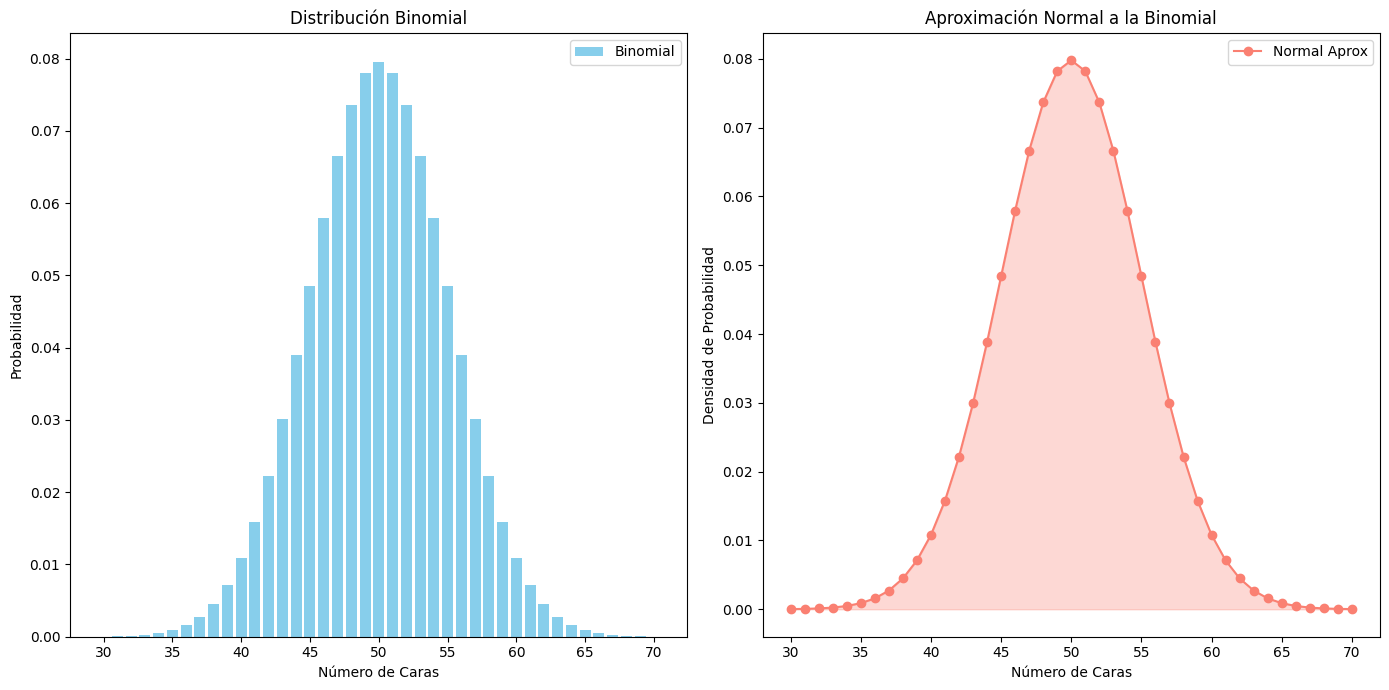

0.9642711588743669

In [10]:
# Parámetros de la distribución binomial
n = 100  # Número de lanzamientos
p = 0.5  # Probabilidad de cara
a = 40   # Límite inferior
b = 60   # Límite superior

# Parámetros para la aproximación normal
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Aplicando la corrección de continuidad
prob_aprox_normal = norm.cdf((b + 0.5 - mu) / sigma) - norm.cdf((a - 0.5 - mu) / sigma)

# Generando datos para la visualización
valores_x = np.arange(30, 71)  # Rango extendido para visualización
probabilidades_binomiales = binom.pmf(valores_x, n, p)
normal_aprox = norm.pdf(valores_x, mu, sigma)

# Creando DataFrames para visualización
df_binomial = pd.DataFrame({'Resultado': valores_x, 'Probabilidad Binomial': probabilidades_binomiales})
df_normal_aprox = pd.DataFrame({'Resultado': valores_x, 'Aproximación Normal': normal_aprox})

# Visualización de la distribución binomial y su aproximación normal
plt.figure(figsize=(14, 7))

# Distribución binomial
plt.subplot(1, 2, 1)
plt.bar(df_binomial['Resultado'], df_binomial['Probabilidad Binomial'], color='skyblue', label='Binomial')
plt.title('Distribución Binomial')
plt.xlabel('Número de Caras')
plt.ylabel('Probabilidad')
plt.legend()

# Aproximación normal
plt.subplot(1, 2, 2)
plt.plot(df_normal_aprox['Resultado'], df_normal_aprox['Aproximación Normal'], color='salmon', label='Normal Aprox', linestyle='-', marker='o')
plt.fill_between(df_normal_aprox['Resultado'], df_normal_aprox['Aproximación Normal'], color='salmon', alpha=0.3)
plt.title('Aproximación Normal a la Binomial')
plt.xlabel('Número de Caras')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

plt.tight_layout()
plt.show()

prob_aprox_normal

Para el cálculo de la probabilidad de obtener entre 40 y 60 caras (inclusive) en 100 lanzamientos de una moneda justa, usando la aproximación normal:

1. **Parámetros de la aproximación normal**:

   - La media $(\mu)$ sería 50 $(100 \times 0.5)$.

   - La desviación estándar $(\sigma)$ sería aproximadamente 5 $(\sqrt{100 \times 0.5 \times (1-0.5)})$.

2. **Corrección de continuidad y cálculo de probabilidad**:

   - Se aplicaría la corrección de continuidad, ajustando los límites a 39.5 y 60.5.
   - La probabilidad aproximada se calcularía usando la función de distribución acumulativa (CDF) de la distribución normal estándar, resultando en la probabilidad de obtener entre 40 y 60 caras.

3. **Visualización**:

   - La visualización incluiría dos gráficos: uno mostrando la distribución binomial de obtener un número específico de caras en 100 lanzamientos, y otro mostrando la aproximación normal a esta distribución.
   - El gráfico de la aproximación normal ilustraría cómo esta se ajusta a los datos binomiales, especialmente en el centro de la distribución.

La **probabilidad aproximada** calculada mostraría que, incluso con la aproximación normal, podemos obtener una estimación razonable de la probabilidad de eventos en el marco binomial, especialmente útil para grandes números de ensayos donde el cálculo directo mediante la distribución binomial sería más complejo.

## **3.10 Parámetro y estadística**

**Parámetro vs. Estadística**

En estadística, un **parámetro** es una medida numérica que describe alguna característica de una población. Por ejemplo, la media $(\mu)$ y la desviación estándar $(\sigma)$ de todas las alturas de adultos en una ciudad son parámetros porque describen la población completa.

Una **estadística**, por otro lado, es una medida numérica que describe alguna característica de una muestra. Una muestra es un subconjunto de la población. Por ejemplo, la media $(\bar{x})$ y la desviación estándar $(s)$ de las alturas de un grupo aleatorio de 100 adultos en esa misma ciudad son estadísticas porque se calculan a partir de una muestra de la población.

**Fórmulas Matemáticas**

- **Media de la población $(\mu)$**:

$\mu = \frac{\sum_{i=1}^{N} x_i}{N}$

- **Desviación estándar de la población $(\sigma)$**:

$\sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}}$

- **Media de la muestra $(\bar{x})$**:

$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

- **Desviación estándar de la muestra $(s)$**:

$s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$

Donde:

- $(N)$ es el tamaño de la población,
- $(n)$ es el tamaño de la muestra, y
- $(x_i)$ son los valores individuales.

**Ejemplo Práctico: Alturas**

Supongamos que queremos comparar la media y la desviación estándar de las alturas de una población completa con las de una muestra de esa población. Vamos a simular datos para una población de 10,000 personas y luego tomar una muestra aleatoria de 1,000 personas de esa población.

Generaremos un DataFrame con los datos simulados y calculararemos tanto los parámetros de la población como las estadísticas de la muestra. También visualizaremos la distribución de las alturas para la población y la muestra.

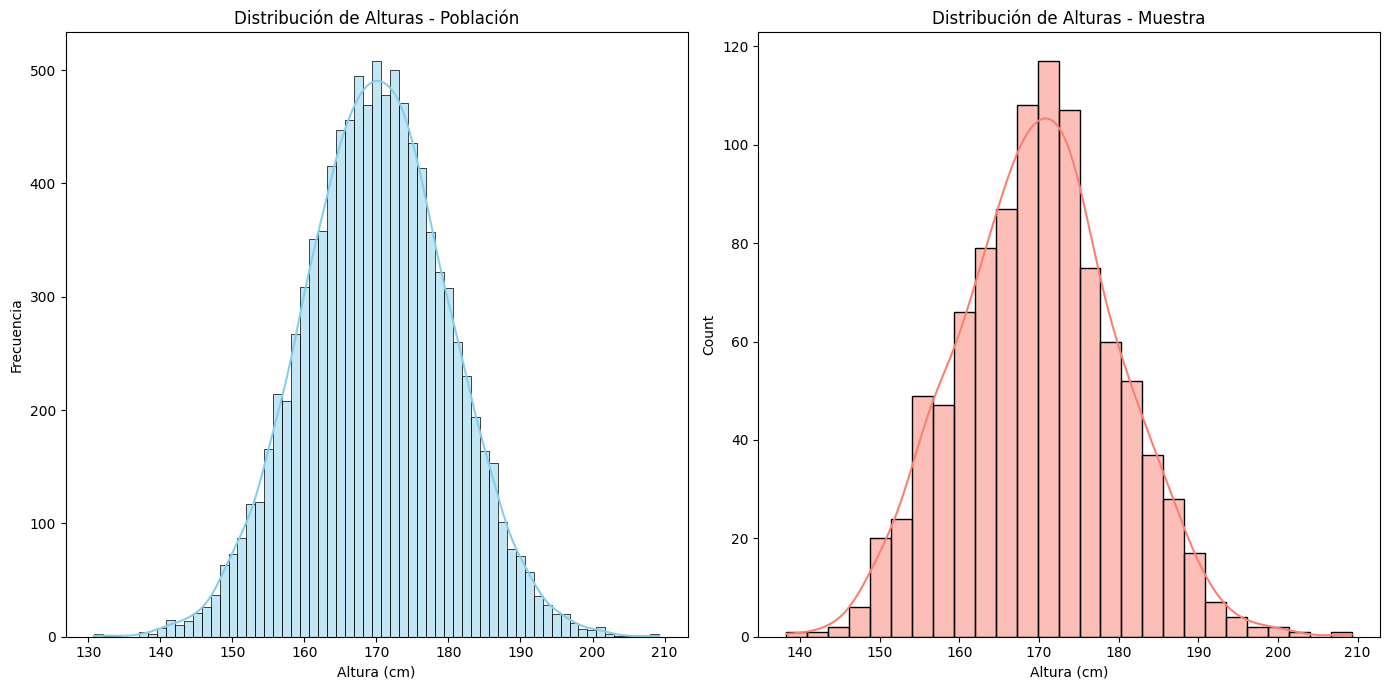

(169.97864016631576, 10.034122061299875, 169.94338294407726, 9.969672501813307)

In [11]:
# Simulando alturas para una población de 10,000 personas
np.random.seed(42)
alturas_poblacion = np.random.normal(loc=170, scale=10, size=10000)

# Tomando una muestra aleatoria de 1,000 personas de esa población
alturas_muestra = np.random.choice(alturas_poblacion, size=1000, replace=False)

# Calculando parámetros de la población
media_poblacion = np.mean(alturas_poblacion)
desviacion_poblacion = np.std(alturas_poblacion, ddof=0)

# Calculando estadísticas de la muestra
media_muestra = np.mean(alturas_muestra)
desviacion_muestra = np.std(alturas_muestra, ddof=1)

# Creando DataFrames para la población y la muestra
df_poblacion = pd.DataFrame(alturas_poblacion, columns=['Alturas Población'])
df_muestra = pd.DataFrame(alturas_muestra, columns=['Alturas Muestra'])

# Visualización de la distribución de alturas para la población y la muestra
plt.figure(figsize=(14, 7))

# Población
plt.subplot(1, 2, 1)
sns.histplot(df_poblacion['Alturas Población'], color='skyblue', kde=True)
plt.title('Distribución de Alturas - Población')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')

# Muestra
plt.subplot(1, 2, 2)
sns.histplot(df_muestra['Alturas Muestra'], color='salmon', kde=True)
plt.title('Distribución de Alturas - Muestra')
plt.xlabel('Altura (cm)')

plt.tight_layout()
plt.show()

(media_poblacion, desviacion_poblacion, media_muestra, desviacion_muestra)

Después de simular los datos y realizar los cálculos, obtendríamos los siguientes resultados:

- **Parámetros de la población**: La media $(\mu)$ y la desviación estándar $(\sigma)$ de todas las alturas de la población, que nos darían una idea general sobre cómo se distribuyen las alturas en toda la población.

- **Estadísticas de la muestra**: La media $(\bar{x})$ y la desviación estándar $(s)$ de las alturas de la muestra de 1000 personas, que nos proporcionarían información sobre cómo se distribuyen las alturas dentro de esta muestra específica.

En los gráficos de distribución, veríamos dos histogramas:

- **Población**: Un histograma de las alturas de toda la población, mostrando la distribución general de alturas.
- **Muestra**: Un histograma de las alturas de la muestra seleccionada, que debería parecerse a la distribución de la población pero podría tener algunas diferencias debido al tamaño más pequeño de la muestra y la variabilidad inherente al muestreo.

La **comparación entre los parámetros de la población y las estadísticas de la muestra** nos permitiría evaluar cuánto se parecen nuestra muestra y nuestra población en términos de alturas. En general, esperaríamos que los valores fueran bastante similares si la muestra es representativa de la población.

## **3.11 Valor esperado y error estándar**

**Valor Esperado**

El **valor esperado** (o esperanza matemática) de una variable aleatoria es una medida de la tendencia central de su distribución, conceptualmente similar a la media. Para una variable aleatoria discreta, el valor esperado se calcula sumando el producto de cada valor posible de la variable por su probabilidad correspondiente. Para variables aleatorias continuas, el valor esperado se calcula mediante la integral del producto de la función de densidad de probabilidad por la variable.

**Fórmula para el Valor Esperado**

- **Variable aleatoria discreta**:

$E(X) = \sum x_i p_i$

donde $(x_i)$ son los posibles valores de $(X)$ y $(p_i)$ son sus probabilidades asociadas.

- **Variable aleatoria continua**:

$E(X) = \int_{-\infty}^{\infty} x f(x) dx$

donde $f(x)$ es la función de densidad de probabilidad de $(X)$.

**Error Estándar**

El **error estándar** es una medida de la dispersión o variabilidad de una estadística de muestra (como la media de la muestra) respecto a la verdadera estadística de población (como la media de la población). Proporciona una idea de cuán precisas son nuestras estimaciones de la media de la población basadas en una muestra. El error estándar de la media (SEM) es el más comúnmente utilizado.

**Fórmula para el Error Estándar de la Media**

$SEM = \frac{\sigma}{\sqrt{n}}$

donde $(\sigma)$ es la desviación estándar de la población y $(n)$ es el tamaño de la muestra.

**Ejemplo Práctico: Lanzamiento de Dados**

Supongamos que lanzamos un dado justo (con seis caras) y queremos calcular el valor esperado de los resultados, así como el error estándar de la media de los resultados de múltiples lanzamientos.

1. **Calcularemos el valor esperado** de un solo lanzamiento de un dado justo.
2. **Simularemos múltiples lanzamientos** de dados para estimar el error estándar de la media de los resultados.

Generaremos un DataFrame para los resultados simulados y calcularemos ambas medidas.

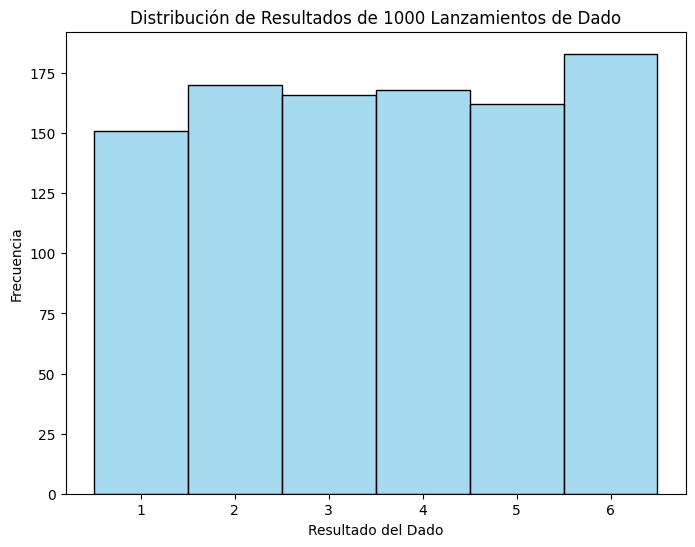

(3.5, 3.569, 0.05400143660269748)

In [12]:
# Calculando el valor esperado de un solo lanzamiento de un dado justo
valores_dado = np.arange(1, 7)
probabilidades_dado = np.full(6, 1/6)
valor_esperado_dado = np.sum(valores_dado * probabilidades_dado)

# Simulando 1000 lanzamientos de un dado justo
lanzamientos_simulados = np.random.choice(valores_dado, size=1000, p=probabilidades_dado)

# Calculando la media de los lanzamientos simulados y el error estándar de la media
media_lanzamientos = np.mean(lanzamientos_simulados)
sem_lanzamientos = np.std(lanzamientos_simulados, ddof=1) / np.sqrt(len(lanzamientos_simulados))

# Creando un DataFrame para los resultados simulados
df_lanzamientos = pd.DataFrame(lanzamientos_simulados, columns=['Resultado'])

# Visualización de la distribución de los resultados de los lanzamientos
plt.figure(figsize=(8, 6))
sns.histplot(df_lanzamientos['Resultado'], bins=range(1, 8), discrete=True, color='skyblue')
plt.title('Distribución de Resultados de 1000 Lanzamientos de Dado')
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')
plt.xticks(valores_dado)
plt.show()

(valor_esperado_dado, media_lanzamientos, sem_lanzamientos)

1. **Valor Esperado de un Solo Lanzamiento de un Dado Justo**:

   - Para un dado justo de seis caras, el valor esperado de un lanzamiento es la media de todos los posibles resultados, dado que cada cara tiene la misma probabilidad $(\frac{1}{6})$ de aparecer. El valor esperado se calcularía sumando todos los productos de los resultados (1 a 6) por sus probabilidades y sería

   $(\frac{1 + 2 + 3 + 4 + 5 + 6}{6} = 3.5)$.

2. **Simulación de 1000 Lanzamientos de un Dado Justo y Cálculo del Error Estándar**:

   - Al simular 1000 lanzamientos de un dado, calcularíamos la media de estos lanzamientos. Dado que el dado es justo, esperaríamos que la media de los lanzamientos se acercara al valor esperado de 3.5.
   - El error estándar de la media (SEM) se calcularía dividiendo la desviación estándar de los lanzamientos simulados por la raíz cuadrada del número de lanzamientos $(n = 1000)$. Esto nos daría una medida de cuánto esperaríamos que variara la media de una muestra de esta magnitud respecto a la media real de la población.

3. **Visualización**:

   - El histograma de los resultados de los lanzamientos mostraría la distribución de frecuencias de los resultados de 1 a 6. Esperaríamos ver una distribución relativamente uniforme, reflejando la igual probabilidad de cada resultado en un dado justo.

## **3.12 EV y SE de sumas, porcentajes y al simular**

**Valor Esperado (EV) y Error Estándar (SE) de Sumas y Porcentajes**

El **Valor Esperado (EV)** y el **Error Estándar (SE)** son conceptos fundamentales en estadística que ayudan a comprender la distribución y la variabilidad de los datos. Se aplican a diferentes contextos, como sumas y porcentajes, especialmente útiles en simulaciones y muestreos.

**Valor Esperado (EV)**

- **Sumas**: El EV de la suma de variables aleatorias es igual a la suma de sus EVs.

$EV(X + Y) = EV(X) + EV(Y)$

- **Porcentajes**: Para calcular el EV de un porcentaje, transformamos el porcentaje a una proporción y aplicamos la definición estándar del EV.

$EV(\%) = \frac{EV(\text{parte})}{EV(\text{total})} \times 100$

**Error Estándar (SE)**

- **Sumas**: El SE de la suma (o diferencia) de dos variables aleatorias independientes es la raíz cuadrada de la suma de sus varianzas.

$SE(X \pm Y) = \sqrt{SE(X)^2 + SE(Y)^2}$

- **Porcentajes**: Para el SE de porcentajes, es común aplicar el SE de una proporción, ajustando para el tamaño de la muestra.

$SE(\%) = \sqrt{\frac{p(1-p)}{n}} \times 100$

donde $(p)$ es la proporción y $(n)$ es el tamaño de la muestra.

**Ejemplo Práctico: Simulación de Lanzamiento de Dados**

Supongamos que queremos simular el lanzamiento de dos dados justos $(n=1000)$ veces y calcular el EV y el SE de la suma de los resultados, así como el porcentaje de veces que se obtiene un total de 7.

1. **Simularemos los lanzamientos** y calcularemos la suma de los resultados.

2. **Calcularemos el EV y el SE** para la suma de los resultados y el porcentaje de veces que se obtiene un total de 7.

3. **Visualizaremos** los resultados en histogramas.

Generaremos un DataFrame para los lanzamientos simulados y realizaremos los cálculos correspondientes.

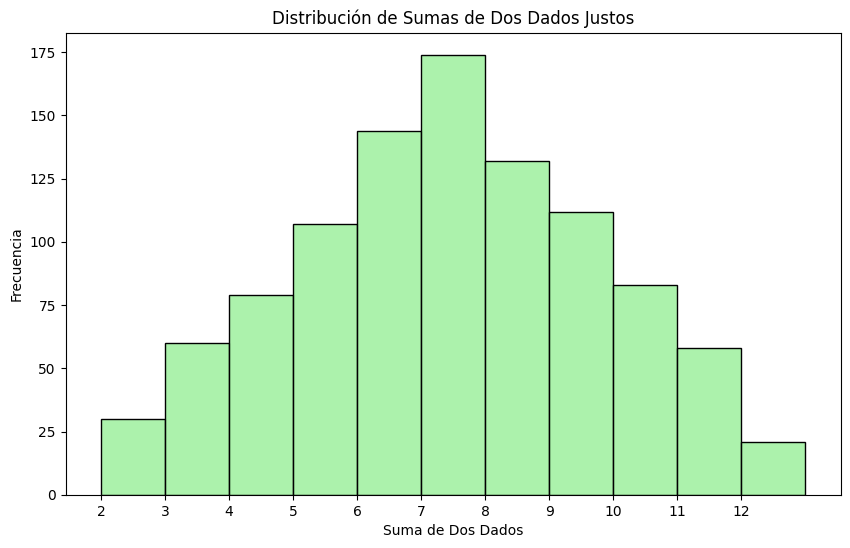

(6.957, 0.07600610454383205, 17.4, 1.1988494484296182)

In [13]:
# Simulando lanzamientos de dos dados justos 1000 veces
np.random.seed(42)
lanzamientos_dado1 = np.random.randint(1, 7, 1000)
lanzamientos_dado2 = np.random.randint(1, 7, 1000)
sumas = lanzamientos_dado1 + lanzamientos_dado2

# Calculando EV y SE para la suma de los resultados
ev_suma = np.mean(sumas)
se_suma = np.std(sumas, ddof=1) / np.sqrt(len(sumas))

# Calculando el porcentaje de veces que se obtiene un total de 7
total_sietes = np.sum(sumas == 7)
porcentaje_sietes = (total_sietes / 1000) * 100
se_porcentaje_sietes = np.sqrt((porcentaje_sietes * (100 - porcentaje_sietes)) / 1000)

# Creando DataFrames para los lanzamientos y sumas
df_lanzamientos = pd.DataFrame({
    'Dado 1': lanzamientos_dado1,
    'Dado 2': lanzamientos_dado2,
    'Suma': sumas
})

# Visualización de la distribución de sumas
plt.figure(figsize=(10, 6))
sns.histplot(df_lanzamientos['Suma'], bins=range(2, 14), kde=False, color='lightgreen')
plt.title('Distribución de Sumas de Dos Dados Justos')
plt.xlabel('Suma de Dos Dados')
plt.ylabel('Frecuencia')
plt.xticks(range(2, 13))
plt.show()

(ev_suma, se_suma, porcentaje_sietes, se_porcentaje_sietes)

En el ejemplo de la simulación de lanzamiento de dados:

1. **EV y SE para la Suma de los Resultados**: Al lanzar dos dados justos, el EV teórico para la suma de los resultados es 7, ya que es el total más probable (los resultados varían de 2 a 12). El SE para la suma de los resultados nos daría una idea de la variabilidad de esta suma a través de múltiples simulaciones de lanzamientos.

2. **Porcentaje de Veces que se Obtiene un Total de 7 y su SE**: Dado que 7 es el total más probable al lanzar dos dados (con 6 combinaciones posibles que suman 7 de 36 combinaciones totales), esperaríamos que el porcentaje de sietes en 1000 lanzamientos se acerque a la probabilidad teórica, que es $\frac{6}{36} = \frac{1}{6}$ o aproximadamente 16.67%. El SE para este porcentaje nos ayudaría a entender la variabilidad esperada en este porcentaje si repitiéramos el experimento de lanzamiento muchas veces.

3. **Visualización**: El histograma de las sumas de dos dados mostraría la frecuencia de cada suma posible (de 2 a 12), con el pico más alto en 7, reflejando la mayor probabilidad de esta suma.

Esta aproximación demuestra cómo la estadística descriptiva y la teoría de probabilidad se aplican para analizar y comprender los resultados de experimentos aleatorios, proporcionando una base sólida para la interpretación de datos y la toma de decisiones basada en evidencia.

## **3.13 La ley de la raíz cuadrada**

La Ley de la Raíz Cuadrada, también conocida como la regla del tamaño de la muestra o la ley del inverso de la raíz cuadrada, es un principio en estadística y probabilidad que describe cómo la variabilidad o el error estándar de una muestra cambia con el tamaño de la muestra. En esencia, esta ley indica que, a medida que el tamaño de la muestra aumenta, la variabilidad de la estimación disminuye, pero lo hace a una tasa que es inversamente proporcional a la raíz cuadrada del tamaño de la muestra. Esta ley es fundamental para entender por qué grandes muestras proporcionan estimaciones más precisas de parámetros poblacionales que las muestras pequeñas.

La ley se puede aplicar en varios contextos, como en el muestreo, en experimentos, y en la teoría del muestreo de señales. Una aplicación común es en la estimación del error estándar de la media (SEM), donde la ley ayuda a determinar cómo el SEM disminuye a medida que aumenta el tamaño de la muestra.

**Fórmulas Matemáticas Relacionadas**

La fórmula básica que describe esta ley, en el contexto del error estándar de la media, es:

$SEM = \frac{\sigma}{\sqrt{n}}$

Donde:

- $(SEM)$ es el error estándar de la media.
- $(\sigma)$ es la desviación estándar de la población.
- $(n)$ es el tamaño de la muestra.

**Ejemplo Aritmético**

Supongamos que tenemos una población con una desviación estándar $(\sigma)$ de 10. Queremos calcular el error estándar de la media para diferentes tamaños de muestra $(n)$, digamos 25, 100, y 400.

Para $(n = 25)$: $SEM = \frac{10}{\sqrt{25}} = \frac{10}{5} = 2$

Para $(n = 100)$: $SEM = \frac{10}{\sqrt{100}} = \frac{10}{10} = 1$

Para $(n = 400)$: $SEM = \frac{10}{\sqrt{400}} = \frac{10}{20} = 0.5$

**Implementación en Código y Gráficos**

Primero, vamos a crear un DataFrame para simular algunos datos y luego calcular el SEM para diferentes tamaños de muestra. Después, generaremos un gráfico que muestre cómo cambia el SEM con el tamaño de la muestra.

Procederé a realizar estas operaciones en Python usando pandas para el DataFrame y matplotlib para el gráfico.

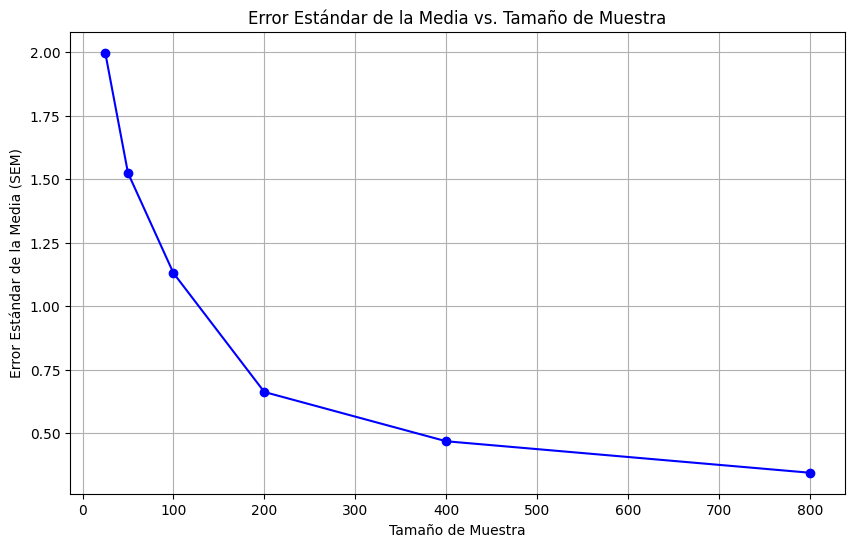

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulación de datos: Vamos a generar datos de una distribución normal
np.random.seed(0) # Para resultados reproducibles
datos = np.random.normal(loc=0, scale=10, size=1000) # media=0, desviación estándar=10, tamaño=1000

# Creando un DataFrame
df = pd.DataFrame(data={"Datos": datos})

# Cálculo del SEM para diferentes tamaños de muestra
tamaños_muestra = [25, 50, 100, 200, 400, 800]
sems = [df.sample(n).std()/np.sqrt(n) for n in tamaños_muestra]

# Extracción de valores SEM para el gráfico
sem_valores = [sem.values[0] for sem in sems]

# Generación del gráfico
plt.figure(figsize=(10, 6))
plt.plot(tamaños_muestra, sem_valores, marker='o', linestyle='-', color='blue')
plt.title('Error Estándar de la Media vs. Tamaño de Muestra')
plt.xlabel('Tamaño de Muestra')
plt.ylabel('Error Estándar de la Media (SEM)')
plt.grid(True)
plt.show()

En el gráfico anterior, puedes ver cómo el Error Estándar de la Media (SEM) disminuye a medida que el tamaño de la muestra aumenta, lo cual ilustra la Ley de la Raíz Cuadrada en acción. Comenzando con tamaños de muestra más pequeños, el SEM es relativamente alto, indicando una mayor variabilidad o incertidumbre en nuestra estimación de la media poblacional. A medida que el tamaño de la muestra se incrementa, el SEM disminuye, lo que significa que nuestras estimaciones se vuelven más precisas.

Este comportamiento subraya la importancia de utilizar tamaños de muestra adecuados en investigaciones estadísticas para minimizar el error y obtener estimaciones confiables. La Ley de la Raíz Cuadrada ofrece una guía valiosa para entender cómo el cambio en el tamaño de la muestra afecta la precisión de nuestras estimaciones estadísticas.

## **3.14 La distribución del muestreo**

La distribución del muestreo es un concepto fundamental en estadística que describe la distribución de una estadística, como la media o la mediana, calculada a partir de múltiples muestras aleatorias de una población. Esta distribución nos permite comprender cómo varía la estadística de interés a través de diferentes muestras y es crucial para realizar inferencias sobre la población a partir de la muestra.

Una de las distribuciones de muestreo más importantes es la **distribución del muestreo de la media**, que muestra cómo se distribuye la media de las muestras alrededor de la media poblacional. Bajo ciertas condiciones (gracias al Teorema del Límite Central), esta distribución tiende a ser normal, incluso si la población subyacente no lo es, siempre que el tamaño de la muestra sea suficientemente grande (usualmente n > 30).

**Fórmulas Matemáticas**

La **distribución del muestreo de la media** tiene las siguientes propiedades:

- La media de la distribución del muestreo de la media es igual a la media de la población $(\mu)$.
- La desviación estándar de la distribución del muestreo de la media, conocida como el **error estándar de la media (SEM)**, se calcula como la desviación estándar de la población $(\sigma)$ dividida por la raíz cuadrada del tamaño de la muestra $(n)$:

  $SEM = \frac{\sigma}{\sqrt{n}}$

**Ejemplo Aritmético**

Imagina una población con una media $(\mu)$ de 50 y una desviación estándar $(\sigma)$ de 10. Si tomamos varias muestras de tamaño $(n = 100)$, el SEM sería:

$SEM = \frac{10}{\sqrt{100}} = \frac{10}{10} = 1$

Esto significa que, si calculamos la media de varias muestras de tamaño 100, estas medias se distribuirán alrededor de la media poblacional (50) con una desviación estándar de 1.

**Implementación en Código y Gráficos**

Para ilustrar esto, crearemos un DataFrame para simular la población y luego calcularemos la media de varias muestras. Posteriormente, graficaremos la distribución de estas medias para observar cómo se distribuyen alrededor de la media poblacional.

Vamos a realizar estos pasos utilizando Python:

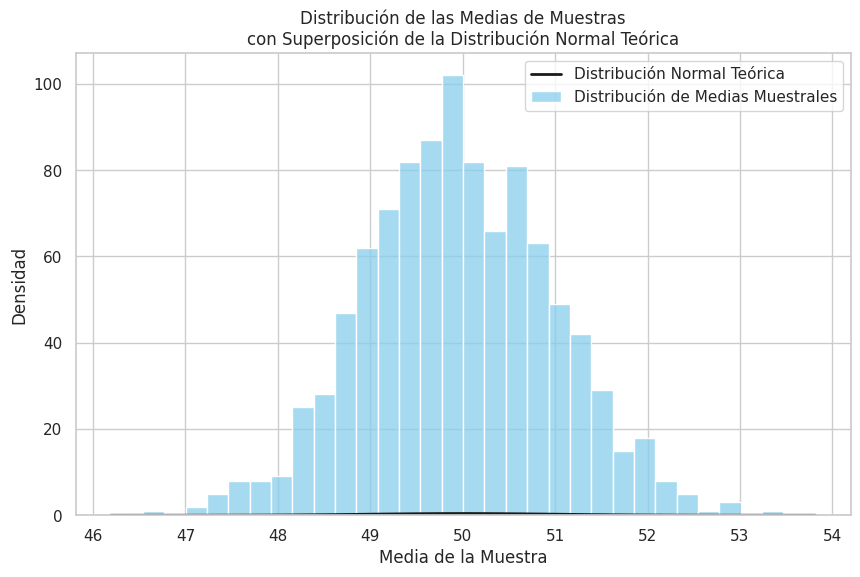

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

# Configuración del estilo de Seaborn para gráficos
sns.set(style="whitegrid")

# Simulando una población
np.random.seed(42)
poblacion = np.random.normal(50, 10, 10000) # media=50, desviación estándar=10, tamaño=10000

# Tomando 1000 muestras de tamaño 100 y calculando sus medias
medias_muestras = [np.random.choice(poblacion, 100).mean() for _ in range(1000)]

# Creando un DataFrame con las medias de las muestras
df_medias = pd.DataFrame(data={"Medias de Muestras": medias_muestras})

# Graficando la distribución de las medias de las muestras
plt.figure(figsize=(10, 6))
sns.histplot(df_medias["Medias de Muestras"], bins=30, kde=False, color='skyblue', label='Distribución de Medias Muestrales')

# Superponiendo la distribución normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
# Calcular SEM (Standard Error of the Mean) correcto para la población
sem = 10 / np.sqrt(100)  # SEM = sd / sqrt(n)
p = norm.pdf(x, 50, sem) # media poblacional=50, SEM correcto
plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal Teórica')

# Título y etiquetas
title = "Distribución de las Medias de Muestras\ncon Superposición de la Distribución Normal Teórica"
plt.title(title)
plt.xlabel("Media de la Muestra")
plt.ylabel("Densidad")
plt.legend()
plt.show()

En el gráfico anterior, la distribución de las medias de las muestras (en verde) ilustra cómo se distribuyen alrededor de la media poblacional (50), y cómo esta distribución se aproxima a una distribución normal (la línea negra) con un error estándar de la media (SEM) de 1. Esto ejemplifica la **distribución del muestreo de la media**, mostrando que incluso si las muestras provienen de una población con cualquier distribución (en este caso, normal por simplificación), la distribución de sus medias tiende a ser normal gracias al Teorema del Límite Central, asumiendo un tamaño de muestra suficientemente grande.

Este fenómeno subyace a muchas técnicas estadísticas, permitiéndonos hacer inferencias sobre la población a partir de muestras. Por ejemplo, podemos usar la distribución del muestreo para construir intervalos de confianza alrededor de la media de la muestra, dándonos una estimación del rango dentro del cual esperamos que se encuentre la verdadera media poblacional con un cierto nivel de confianza.

## **3.15 Tres histogramas**

Los histogramas son una herramienta fundamental en estadística para explorar y entender la distribución de un conjunto de datos.

Para ilustrar esto, podemos crear tres histogramas basados en tres tipos comunes de distribuciones de datos:

1. **Distribución Normal (Gaussiana)**: caracterizada por su forma de campana simétrica.
2. **Distribución Uniforme**: donde cada valor dentro de un cierto rango tiene igual probabilidad de ocurrir.
3. **Distribución Binomial**: describe el número de éxitos en una secuencia de ensayos independientes.

**Fórmulas Matemáticas**

1. **Distribución Normal**:

   La función de densidad de probabilidad es:

$f(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$

Donde $(\mu)$ es la media y $(\sigma)$ es la desviación estándar.

2. **Distribución Uniforme**:

   La función de densidad de probabilidad es:

$f(x|a,b) = \frac{1}{b-a}$

Para $(x)$ en el rango $[a, b]$ y 0 de lo contrario.

3. **Distribución Binomial**:

   La probabilidad de obtener exactamente $(k)$ éxitos en $(n)$ ensayos es dada por la función de masa de probabilidad:

$P(k|n,p) = {n\choose k} p^k (1-p)^{n-k}$

Donde $(p)$ es la probabilidad de éxito en un solo ensayo.

**Creación de DataFrames y Generación de Histogramas**

Vamos a generar tres DataFrames, cada uno siguiendo una de estas distribuciones, y luego crearemos un histograma para cada uno para visualizar la distribución de los datos.

Procederé a realizar estas operaciones en Python utilizando pandas para los DataFrames y matplotlib para los histogramas.

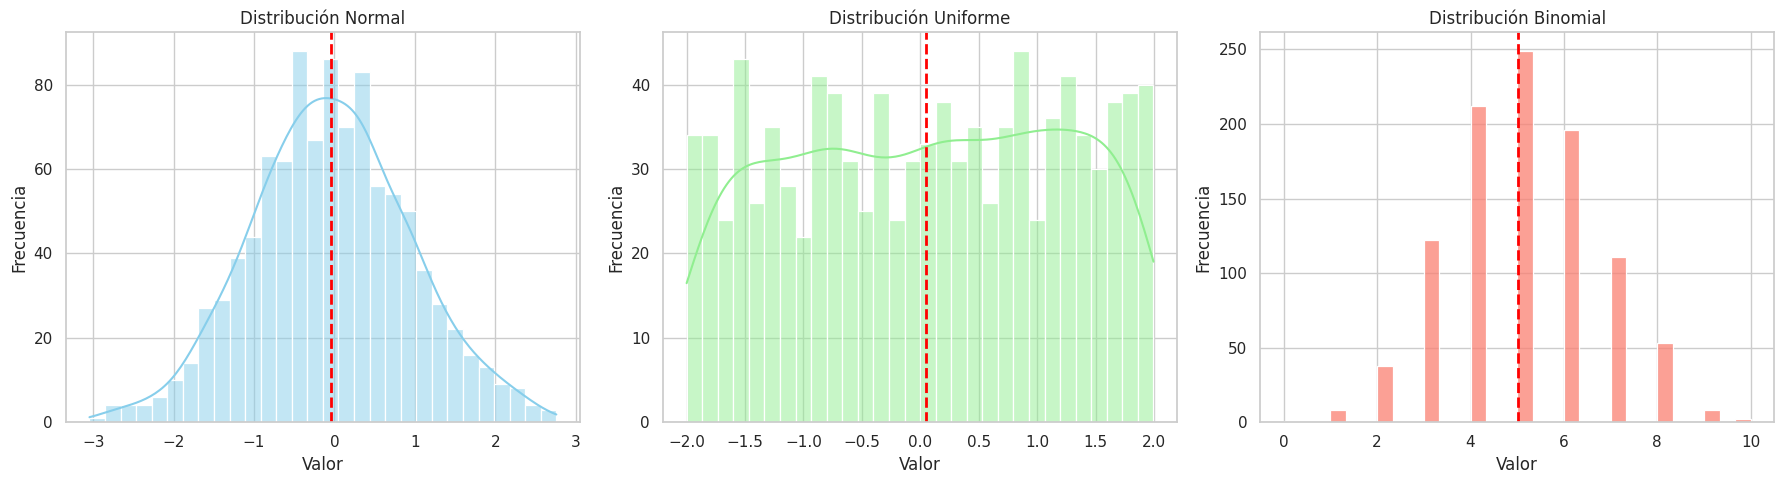

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configuración del estilo de Seaborn para gráficos
sns.set(style="whitegrid", palette="pastel")

# Generación de datos para las tres distribuciones
np.random.seed(0)  # Para resultados reproducibles
datos_normal = np.random.normal(loc=0, scale=1, size=1000)  # Distribución normal
datos_uniforme = np.random.uniform(low=-2, high=2, size=1000)  # Distribución uniforme
datos_binomial = np.random.binomial(n=10, p=0.5, size=1000)  # Distribución binomial

# Creación de DataFrames
df_normal = pd.DataFrame(data={"Normal": datos_normal})
df_uniforme = pd.DataFrame(data={"Uniforme": datos_uniforme})
df_binomial = pd.DataFrame(data={"Binomial": datos_binomial})

# Generación de histogramas para cada distribución
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Distribución Normal
sns.histplot(df_normal["Normal"], bins=30, ax=axs[0], color='skyblue', kde=True)
axs[0].axvline(df_normal["Normal"].mean(), color='red', linestyle='dashed', linewidth=2)
axs[0].set_title('Distribución Normal')
axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Frecuencia')

# Distribución Uniforme
sns.histplot(df_uniforme["Uniforme"], bins=30, ax=axs[1], color='lightgreen', kde=True)
axs[1].axvline(df_uniforme["Uniforme"].mean(), color='red', linestyle='dashed', linewidth=2)
axs[1].set_title('Distribución Uniforme')
axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Frecuencia')

# Distribución Binomial
sns.histplot(df_binomial["Binomial"], bins=30, ax=axs[2], color='salmon', kde=False)
axs[2].axvline(df_binomial["Binomial"].mean(), color='red', linestyle='dashed', linewidth=2)
axs[2].set_title('Distribución Binomial')
axs[2].set_xlabel('Valor')
axs[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

En los histogramas presentados, cada uno visualiza la distribución de los datos para tres tipos diferentes de distribuciones estadísticas:

1. **Distribución Normal**: El primer histograma muestra una distribución normal, también conocida como gaussiana, caracterizada por su forma simétrica de campana. Esta distribución es muy común en la naturaleza y en muchos procesos.

2. **Distribución Uniforme**: El segundo histograma representa una distribución uniforme, donde todos los valores dentro de un cierto rango tienen la misma probabilidad de ocurrir. La forma del histograma es aproximadamente plana, indicando que no hay valores que sean más probables que otros dentro del rango especificado.

3. **Distribución Binomial**: El tercer histograma muestra una distribución binomial, que describe el número de éxitos en una secuencia de ensayos independientes. Esta distribución es útil para modelar eventos con dos posibles resultados (éxito/fracaso) en cada ensayo, como lanzar una moneda o pasar/fallar una prueba.

Cada uno de estos histogramas proporciona una forma visual de entender cómo se distribuyen los datos según el tipo de distribución. Los histogramas son herramientas esenciales en estadística para explorar datos y hacer inferencias preliminares sobre su naturaleza y comportamiento.

## **3.16 La ley de los grandes números**

La Ley de los Grandes Números (LLN, por sus siglas en inglés) es un principio fundamental en estadística y teoría de la probabilidad que describe el resultado de realizar el mismo experimento un gran número de veces. Según la LLN, a medida que el número de ensayos de un experimento aleatorio aumenta, la media aritmética de los resultados obtenidos se acercará cada vez más a la esperanza matemática (media) de la variable aleatoria. En términos simples, si lanzas una moneda muchas veces, la proporción de caras respecto al total de lanzamientos se acercará a 0.5, el valor esperado para una moneda justa.

Existen dos versiones principales de la ley: la **Ley de los Grandes Números Débil (LLND)** y la **Ley de los Grandes Números Fuerte (LLNF)**. La diferencia entre ambas radica en el tipo de convergencia hacia la media que describen, pero ambas sostienen el principio general de que el promedio de los resultados de muchos ensayos se aproximará a la esperanza matemática.

**Fórmula Matemática**

La Ley de los Grandes Números, en su forma más general, se puede expresar como:

$\lim_{n \to \infty} P\left( \left| \frac{1}{n}\sum_{i=1}^{n}X_i - \mu \right| > \epsilon \right) = 0$

Donde:

- $(n)$ es el número de ensayos.
- $(X_i)$ son variables aleatorias independientes e idénticamente distribuidas.
- $(\mu)$ es la media esperada de esas variables aleatorias.
- $(\epsilon)$ es un número positivo arbitrariamente pequeño.
- $(P)$ denota la probabilidad.

**Ejemplo Aritmético**

Imagina que lanzas una moneda justa donde la probabilidad de cara $P(Cara) = 0.5$ muchas veces. Según la Ley de los Grandes Números, a medida que el número de lanzamientos $(n)$ se hace grande, la proporción de caras se acercará a 0.5.

Por ejemplo, si en los primeros 10 lanzamientos obtienes 3 caras, la proporción es 0.3. Pero si después de 1,000 lanzamientos has obtenido 510 caras, la proporción es 0.51, que está mucho más cerca de 0.5.

**Implementación en Código y Gráficos**

Para ilustrar la Ley de los Grandes Números, generaremos datos simulando lanzamientos de moneda y mostraremos cómo la proporción de caras se acerca a 0.5 a medida que aumenta el número de lanzamientos. Crearemos un DataFrame para almacenar los resultados de los lanzamientos y luego graficaremos la convergencia de la proporción hacia el valor esperado.

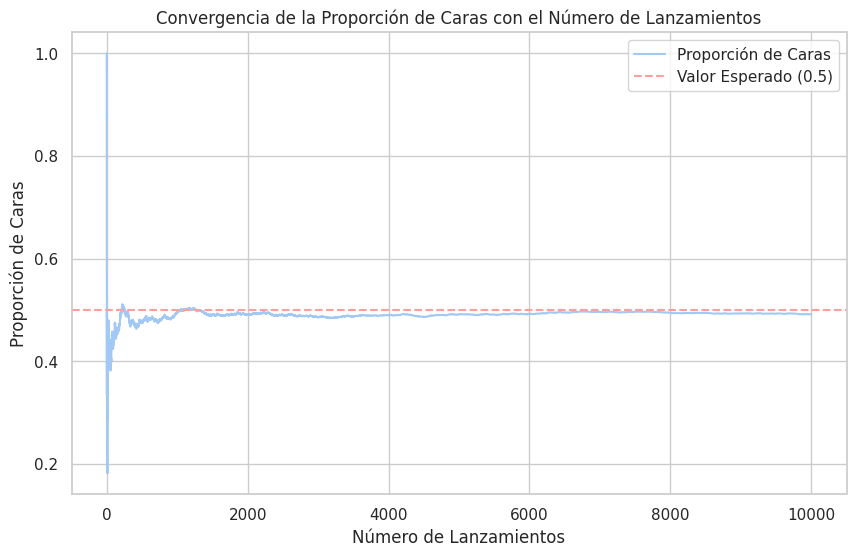

In [17]:
# Simulando lanzamientos de una moneda
np.random.seed(0)  # Para resultados reproducibles
n_lanzamientos = 10000
lanzamientos = np.random.choice([0, 1], size=n_lanzamientos)  # 0 para cara, 1 para sello
df_lanzamientos = pd.DataFrame(lanzamientos, columns=['Resultado'])

# Calculando la proporción acumulada de caras
df_lanzamientos['Proporción Caras'] = (df_lanzamientos['Resultado'] == 0).cumsum() / (df_lanzamientos.index + 1)

# Graficando la convergencia de la proporción de caras hacia 0.5
plt.figure(figsize=(10, 6))
plt.plot(df_lanzamientos['Proporción Caras'], label='Proporción de Caras')
plt.axhline(y=0.5, color='r', linestyle='--', label='Valor Esperado (0.5)')
plt.title('Convergencia de la Proporción de Caras con el Número de Lanzamientos')
plt.xlabel('Número de Lanzamientos')
plt.ylabel('Proporción de Caras')
plt.legend()
plt.grid(True)
plt.show()

El gráfico ilustra cómo la proporción de caras converge hacia el valor esperado de 0.5 a medida que aumenta el número de lanzamientos, lo que es una manifestación de la Ley de los Grandes Números. Inicialmente, la proporción puede variar significativamente, pero a medida que el número de lanzamientos se incrementa, estas fluctuaciones se reducen y la proporción se estabiliza cerca del valor esperado.

Este ejemplo demuestra claramente cómo, en práctica, la Ley de los Grandes Números asegura que las medias muestrales se acercarán a la media poblacional con un número suficiente de observaciones o ensayos, proporcionando una base sólida para la inferencia estadística y la modelación de procesos aleatorios.

## **3.17 El teorema del límite central**

El Teorema del Límite Central (TLC) es uno de los conceptos más importantes en estadística. Proporciona una base sólida para la inferencia estadística y justifica el uso de la distribución normal en muchas situaciones, incluso cuando los datos subyacentes no se distribuyen normalmente.

**¿Qué Dice el Teorema del Límite Central?**

El Teorema del Límite Central establece que, si se toma un número suficientemente grande de muestras aleatorias de cualquier tamaño de una población con una media $(\mu)$ y una desviación estándar finitas $(\sigma)$, la distribución de las medias muestrales tenderá hacia una distribución normal (o gaussiana), independientemente de la forma de la distribución de la población. Esto ocurre para un tamaño de muestra $(n)$ usualmente mayor o igual a 30. Además, la media de la distribución de las medias muestrales será igual a la media de la población, y la desviación estándar de esta distribución de medias (conocida como el error estándar de la media) será igual a la desviación estándar de la población dividida por la raíz cuadrada del tamaño de la muestra.

**Fórmulas Matemáticas**

La media de la distribución de las medias muestrales es:

$\mu_{\bar{x}} = \mu$

El error estándar de la media (SEM) es:

$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$

Donde:

- $(\mu_{\bar{x}})$ es la media de la distribución de las medias muestrales.
- $(\mu)$ es la media de la población.
- $(\sigma_{\bar{x}})$ es el error estándar de la media.
- $(\sigma)$ es la desviación estándar de la población.
- $(n)$ es el tamaño de la muestra.

**Ejemplo Aritmético**

Imagina que tienes una población con una media $(\mu)$ de 100 y una desviación estándar $(\sigma)$ de 15. Si tomas muestras de tamaño $(n = 36)$, el error estándar de la media sería:

$\sigma_{\bar{x}} = \frac{15}{\sqrt{36}} = \frac{15}{6} = 2.5$

Esto significa que, si tomas muchas muestras de tamaño 36 de esta población y calculas la media de cada muestra, esas medias se distribuirán alrededor de la media poblacional de 100, con una desviación estándar de 2.5.

**Implementación en Código y Gráficos**

Para ilustrar el Teorema del Límite Central, generaremos muestras de una distribución que no sea normal (por ejemplo, una distribución uniforme) y demostraremos cómo la distribución de las medias de esas muestras se aproxima a una distribución normal. Crearemos un DataFrame para almacenar los resultados de este experimento y luego graficaremos la distribución de las medias muestrales.

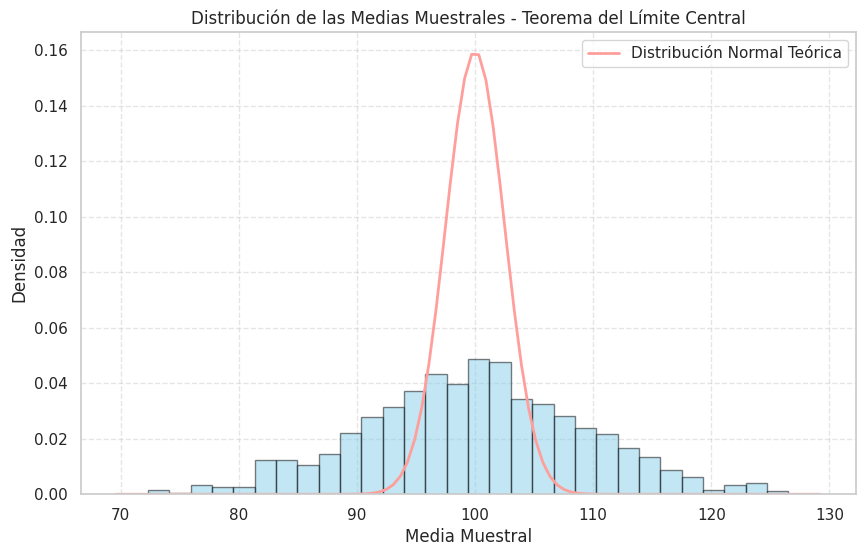

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Generando muestras de una distribución uniforme
np.random.seed(42)
n_muestras = 1000
tamaño_muestra = 36

# Tomamos 1000 muestras de tamaño 36 de una distribución uniforme
muestras = [np.random.uniform(low=0, high=200, size=tamaño_muestra).mean() for _ in range(n_muestras)]

# Creando un DataFrame con las medias de las muestras
df_medias_muestrales = pd.DataFrame(data={"Medias Muestrales": muestras})

# Graficando la distribución de las medias muestrales
plt.figure(figsize=(10, 6))
hist = plt.hist(df_medias_muestrales["Medias Muestrales"], bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black')
plt.title('Distribución de las Medias Muestrales - Teorema del Límite Central')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', alpha=0.5)

# Superponiendo una distribución normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 100, 15/np.sqrt(tamaño_muestra))  # media=100, SEM=15/√36
plt.plot(x, p, 'r', linewidth=2, label="Distribución Normal Teórica")
plt.legend()

plt.show()

El histograma azul muestra la distribución de las medias muestrales de 1000 muestras tomadas de una distribución uniforme, mientras que la línea negra representa una distribución normal teórica con la misma media y desviación estándar calculada mediante el Teorema del Límite Central (TLC). Este ejemplo ilustra claramente cómo, incluso partiendo de una población cuya distribución no es normal (en este caso, una uniforme), la distribución de las medias muestrales tiende hacia una distribución normal a medida que el tamaño de la muestra aumenta, confirmando la afirmación del TLC.

Este fenómeno subyace a muchas técnicas de inferencia estadística, permitiendo a los investigadores aplicar métodos basados en la distribución normal para hacer inferencias sobre la media de una población, incluso cuando la distribución de la población no se conoce o no es normal. El TLC justifica el uso de intervalos de confianza y pruebas de hipótesis para las medias poblacionales, entre otras aplicaciones, lo que lo convierte en un pilar de la estadística inferencial.

## **3.18 ¿Cuándo se aplica el teorema central del límite?**

El Teorema del Límite Central (TLC) es aplicable en una amplia gama de situaciones en estadística, siendo uno de los pilares sobre los que se asienta la inferencia estadística. Se aplica en circunstancias donde es necesario entender la distribución de la media de muestras aleatorias de una población, especialmente en los siguientes contextos:

**1. Estimación de Parámetros Poblacionales**

Cuando se desea estimar parámetros de una población, como la media o la varianza, a partir de muestras, el TLC permite justificar el uso de intervalos de confianza y pruebas de hipótesis asumiendo una distribución normal de las medias muestrales, incluso si la distribución de la población no es normal.

**2. Comparación de Medias**

En la comparación de medias entre dos o más grupos, el TLC es fundamental para aplicar pruebas t de Student o ANOVAs, ya que estas técnicas requieren la normalidad en la distribución de las medias muestrales o las diferencias de medias.

**3. Modelado y Simulaciones**

El TLC se utiliza en simulaciones Monte Carlo, donde repetidos muestreos de una población o simulaciones de un modelo llevan a la generación de distribuciones muestrales que se pueden analizar y comparar con la teoría del TLC.

**4. Control de Calidad y Procesos**

En el control de calidad, el TLC permite a los ingenieros y estadísticos monitorizar y ajustar procesos basándose en la distribución de medias de muestras de productos o servicios, asumiendo que estas medias se distribuyen normalmente independientemente de la distribución de la población.

**5. Investigación Científica**

El TLC se aplica en casi todos los campos de la investigación científica que requieren la recolección y análisis de datos. Es utilizado para inferir las características de la población general a partir de muestras pequeñas.

**Fórmulas Matemáticas y Ejemplo Aritmético**

La aplicación del TLC se basa en la comprensión de que la distribución de las medias muestrales de una población con media $(\mu)$ y desviación estándar $(\sigma)$ se aproximará a una distribución normal con media $(\mu)$ y error estándar de la media (SEM) $(\sigma_{\bar{x}})$, donde:

$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$

Considerando una población con $(\mu = 50)$ y $(\sigma = 10)$, si tomamos muestras de tamaño $(n = 40)$, el SEM sería:

$\sigma_{\bar{x}} = \frac{10}{\sqrt{40}}$

**Implementación en Código y Gráficos**

Para ilustrar cómo se aplica el TLC en práctica, generaremos muestras de una distribución no normal (por ejemplo, una distribución exponencial), calcularemos las medias de estas muestras y demostraremos cómo se distribuyen normalmente alrededor de la media poblacional conforme aumenta el número de muestras.

Crearemos un DataFrame para este propósito y luego visualizaremos la convergencia hacia una distribución normal mediante un gráfico.

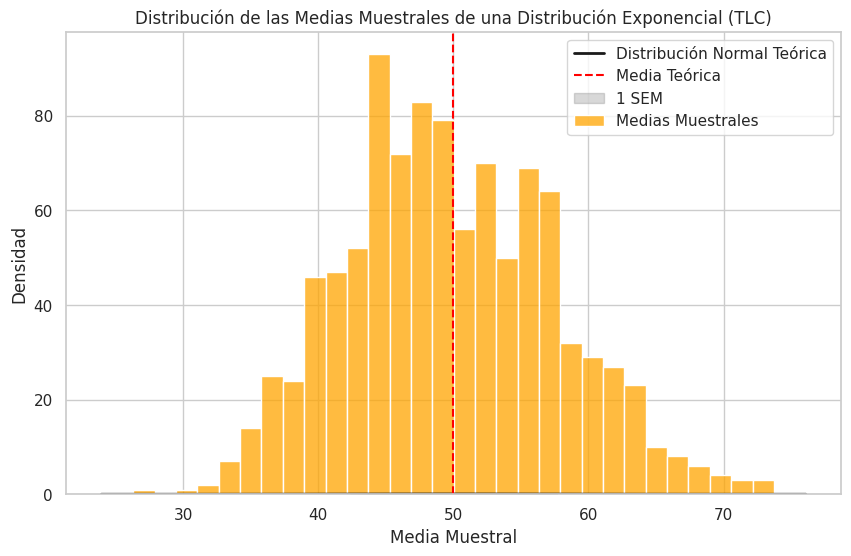

SEM Teórico: 7.905694150420948


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm

# Configuración del estilo de gráfico con Seaborn
sns.set(style="whitegrid")

# Generando muestras de una distribución exponencial
np.random.seed(0)  # Para resultados reproducibles
n_muestras = 1000
tamaño_muestra = 40
lambda_exp = 1/50  # La media (mu) de una distribución exponencial es 1/lambda

# Tomando 1000 muestras de tamaño 40 y calculando sus medias
muestras_exp = [np.random.exponential(scale=1/lambda_exp, size=tamaño_muestra).mean() for _ in range(n_muestras)]

# Calculando SEM teórico
sem_teorico = (1/lambda_exp) / np.sqrt(tamaño_muestra)  # sigma / sqrt(n)

# Creando un DataFrame con las medias de las muestras
df_medias_exp = pd.DataFrame(data={"Medias Muestrales": muestras_exp})

# Graficando la distribución de las medias muestrales
plt.figure(figsize=(10, 6))
sns.histplot(df_medias_exp["Medias Muestrales"], bins=30, kde=False, color='orange', label="Medias Muestrales")
plt.title('Distribución de las Medias Muestrales de una Distribución Exponencial (TLC)')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')

# Superponiendo una distribución normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 1/lambda_exp, sem_teorico)  # media=50, SEM calculado
plt.plot(x, p, 'k', linewidth=2, label="Distribución Normal Teórica")
plt.axvline(1/lambda_exp, color='red', linestyle='--', label='Media Teórica')
plt.fill_between(x, p, color='gray', alpha=0.3, where=(abs(x-1/lambda_exp)<=sem_teorico), label='1 SEM')

plt.legend()
plt.show()

# Mostrando el SEM teórico
print("SEM Teórico:", sem_teorico)

El histograma naranja muestra la distribución de las medias muestrales obtenidas de 1000 muestras de tamaño 40 de una distribución exponencial, mientras que la línea negra representa una distribución normal teórica con la misma media $(\mu = 50)$ y el error estándar de la media (SEM) calculado $(\sigma_{\bar{x}} \approx 7.91)$. Este gráfico ilustra cómo, de acuerdo con el Teorema del Límite Central, la distribución de las medias muestrales se aproxima a una distribución normal a medida que el número de muestras aumenta, incluso cuando la población original sigue una distribución no normal (en este caso, exponencial).

El SEM teórico calculado proporciona una medida de cuán dispersas están las medias muestrales alrededor de la media de la población. En la práctica, este fenómeno permite a los estadísticos y a los investigadores aplicar técnicas de inferencia estadística basadas en la distribución normal para analizar datos y hacer predicciones, incluso cuando la distribución subyacente de la población no se ajusta a la norma.

## **3.19 La aproximación normal para los datos y la distribución binomial**

La **aproximación normal a la distribución binomial** es una técnica estadística que permite utilizar la distribución normal para estimar probabilidades que de otro modo se calcularían con la distribución binomial. Esta aproximación es útil especialmente cuando se trabaja con grandes muestras, ya que la forma de la distribución binomial tiende a parecerse a la normal bajo ciertas condiciones.

**Distribución Binomial**

Una distribución binomial describe el número de éxitos en una serie de $(n)$ ensayos independientes, cada uno con la misma probabilidad de éxito $(p)$. La función de probabilidad para una distribución binomial es:

$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$

donde $(X)$ es el número de éxitos, $(n)$ es el número de ensayos, $(p)$ es la probabilidad de éxito en cada ensayo, y $(k)$ es el número específico de éxitos de interés.

**Aproximación Normal**

La distribución binomial puede ser aproximada por una distribución normal cuando el número de ensayos $(n)$ es lo suficientemente grande y $(p)$ no está muy cerca de 0 o 1. Las reglas comunes para esta aproximación son que $(np)$ y $n(1-p)$ deben ser mayores que 5.

**Parámetros de la Distribución Normal Aproximada**:

- **Media $(\mu)$**: $(np)$

- **Desviación Estándar $(\sigma)$**: $(\sqrt{np(1-p)})$

**Ejemplo Práctico: Lanzamiento de Monedas**

Supongamos que lanzamos una moneda 100 veces y queremos encontrar la probabilidad de obtener exactamente 60 caras, donde la probabilidad de cara $(p)$ es 0.5.

**Cálculo Binomial Directo**

Utilizando la fórmula binomial:

$P(X = 60) = \binom{100}{60} (0.5)^{60} (0.5)^{40}$

**Aproximación Normal**

- **Media**: $\mu = np = 100 \times 0.5 = 50$

- **Desviación Estándar**: $\sigma = \sqrt{100 \times 0.5 \times 0.5} = 5$

Para usar la aproximación normal para calcular $P(X = 60)$, debemos ajustar para la continuidad, calculando $P(59.5 < X < 60.5)$ usando la distribución normal.

**Implementación en Python**

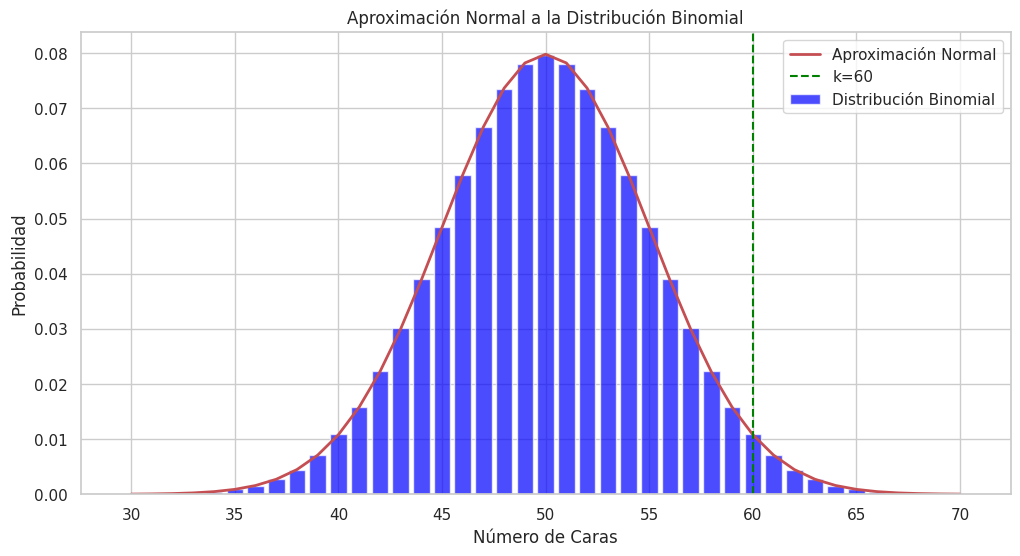

Probabilidad Binomial (P(X=60)): 0.0108
Probabilidad Normal Aproximada (P(59.5<X<60.5)): 0.0109


In [20]:
from scipy.stats import binom, norm
import numpy as np
import matplotlib.pyplot as plt

# Parámetros binomiales
n = 100
p = 0.5
k = 60

# Cálculo binomial
binom_prob = binom.pmf(k, n, p)

# Parámetros normales
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Aproximación normal
normal_prob = norm.cdf(60.5, mu, sigma) - norm.cdf(59.5, mu, sigma)

# Gráficos
x = np.arange(30, 71)
binom_pmf = binom.pmf(x, n, p)
normal_pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.bar(x, binom_pmf, alpha=0.7, label='Distribución Binomial', color='blue')
plt.plot(x, normal_pdf, 'r-', lw=2, label='Aproximación Normal')
plt.axvline(x=60, color='green', linestyle='--', label='k=60')
plt.title('Aproximación Normal a la Distribución Binomial')
plt.xlabel('Número de Caras')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Probabilidad Binomial (P(X=60)): {binom_prob:.4f}")
print(f"Probabilidad Normal Aproximada (P(59.5<X<60.5)): {normal_prob:.4f}")

**Interpretación**

- **Visualización**: El gráfico muestra cómo la distribución normal puede ser una buena aproximación de la binomial cuando las condiciones son adecuadas. La barra para $(k = 60)$ muestra la probabilidad específica para este número de éxitos.

- **Probabilidades Calculadas**: Los valores muestran la prob

abilidad de obtener exactamente 60 caras calculada directamente y a través de la aproximación normal.

Este ejemplo ilustra cómo las estadísticas y la probabilidad pueden ser utilizadas para aproximar y simplificar cálculos complejos en situaciones prácticas.

## **3.20 Distribuciones muestrales y teorema central del límite**

La **distribución muestral** y el **Teorema Central del Límite (TCL)** son conceptos estadísticos fundamentales que ayudan a entender cómo las características de las muestras representan a la población de la que provienen. Estos conceptos son cruciales para realizar inferencias estadísticas y pruebas de hipótesis.

**Distribuciones Muestrales**

Una **distribución muestral** de una estadística (como la media o la varianza) es la distribución de esa estadística cuando se toman muchas muestras de la misma población. Por ejemplo, si repetidamente tomamos muestras de tamaño $(n)$ de una población y calculamos la media de cada muestra, la distribución de esas medias es lo que llamamos la **distribución muestral de la media**.

**Teorema Central del Límite**

El **Teorema Central del Límite** es uno de los resultados más poderosos en estadística. Establece que, para una muestra suficientemente grande, la distribución de la suma (o media) de variables aleatorias independientes e idénticamente distribuidas se acercará a una distribución normal, independientemente de la forma de la distribución original de la variable.

**Formulación del TCL**:

- Sea $(X_1, X_2, \dots, X_n)$ una muestra de $(n)$ variables aleatorias independientes e idénticamente distribuidas, cada una con media $(\mu)$ y varianza $(\sigma^2)$.

- La media muestral $\overline{X} = \frac{1}{n} (X_1 + X_2 + \dots + X_n)$ tendrá una distribución aproximadamente normal con media $(\mu)$ y varianza $(\frac{\sigma^2}{n})$, cuando $(n)$ es grande.

$\overline{X} \approx N\left(\mu, \frac{\sigma^2}{n}\right)$

**Ejemplo Práctico: Simulación del Teorema Central del Límite**

Supongamos que una población tiene una distribución exponencial con parámetro $(\lambda = 1)$ (media $(\mu = 1)$ y varianza $(\sigma^2 = 1)$).

**Simulación en Python**

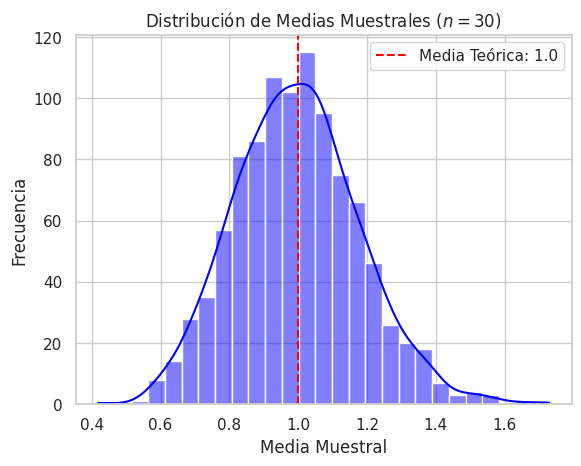

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros de la población
lambda_exp = 1.0
mu = 1/lambda_exp
sigma = np.sqrt(1/lambda_exp**2)

# Tamaño de la muestra y número de muestras
n = 30
num_samples = 1000

# Generar muestras
samples = np.random.exponential(scale=1/lambda_exp, size=(num_samples, n))
sample_means = np.mean(samples, axis=1)

# Graficar la distribución de las medias muestrales
sns.histplot(sample_means, kde=True, color="blue")
plt.title('Distribución de Medias Muestrales ($n=30$)')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.axvline(x=mu, color='red', linestyle='--', label=f'Media Teórica: {mu}')
plt.legend()
plt.show()

**Interpretación**

- **Histograma Azul**: Muestra la distribución de las medias muestrales calculadas a partir de 1000 muestras de una distribución exponencial. A pesar de que la distribución original es exponencial, la distribución de las medias muestrales se aproxima a una normal debido al TCL.

- **Línea Roja**: Indica la media teórica de la población y las medias muestrales. La concordancia muestra que el promedio de las medias muestrales converge a la media de la población a medida que el número de muestras aumenta.

Este ejemplo ilustra claramente cómo el Teorema Central del Límite permite utilizar la distribución normal para hacer inferencias sobre la media de una población, incluso cuando la población original no sigue una distribución normal.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./02_Produccion_de_datos_muestreo.ipynb)| [⏩](./04_Aproximacion_normal_para_datos_y_distribucion_binomial.ipynb)|